In [3]:
%pip install jaxlib jax optax flax

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 306.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 MB 8.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.2 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.7/223.7 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 685.9/685.9 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.7/240.7 kB 5.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.1/385.1 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.5 MB/s eta 

In [6]:
%pip install matplotlib numpy scikit-learn

  Using cached matplotlib-3.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 13.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 16.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 3.5 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 14.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 4.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 1.9 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
import optax
import numpy as np
import jax
import jax.numpy as jnp
from flax import linen as nn
import matplotlib.pyplot as plt
import sys
import os

# Add /src to path
path_to_src = os.path.abspath(os.path.join(os.getcwd(), '../src'))
if path_to_src not in sys.path:
    sys.path.append(path_to_src)
from sklearn.model_selection import train_test_split
from KAN import KAN

%load_ext autoreload
%autoreload 2

In [74]:
# Initialize model
key = jax.random.PRNGKey(23232)

layer_dims = [1, 3, 2, 1]
model = KAN(layer_dims=layer_dims, k=3, const_spl=False, const_res=False, add_bias=True, grid_e=1.0)
variables = model.init(key, jnp.linspace(0,3,5).reshape(-1,1))

In [75]:
tabulate_fn=nn.tabulate(model, jax.random.PRNGKey(11))
tt = jnp.linspace(0,3,5).reshape(-1,1)
table=tabulate_fn(tt)
print(table)


                                  KAN Summary                                   
┏━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ path     ┃ module   ┃ inputs      ┃ outputs     ┃ params       ┃ state       ┃
┡━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│          │ KAN      │ float32[5,… │ -           │ bias_0:      │             │
│          │          │             │ float32[5,… │ float32[3]   │             │
│          │          │             │ - -         │ bias_1:      │             │
│          │          │             │ float32[3,… │ float32[2]   │             │
│          │          │             │   -         │ bias_2:      │             │
│          │          │             │ float32[2,… │ float32[1]   │             │
│          │          │             │   -         │              │             │
│          │          │             │ float32[1,… │ 6 (24 B)     │             │
├──────────┼──────────┼────

In [66]:
variables0['state']

{'layers_0': {'grid': Array([[-3.        , -2.3333335 , -1.6666667 , -1.        , -0.3333333 ,
           0.33333337,  1.        ,  1.6666667 ,  2.3333335 ,  3.        ],
         [-3.        , -2.3333335 , -1.6666667 , -1.        , -0.3333333 ,
           0.33333337,  1.        ,  1.6666667 ,  2.3333335 ,  3.        ],
         [-3.        , -2.3333335 , -1.6666667 , -1.        , -0.3333333 ,
           0.33333337,  1.        ,  1.6666667 ,  2.3333335 ,  3.        ]],      dtype=float32)},
 'layers_1': {'grid': Array([[-3.        , -2.3333335 , -1.6666667 , -1.        , -0.3333333 ,
           0.33333337,  1.        ,  1.6666667 ,  2.3333335 ,  3.        ],
         [-3.        , -2.3333335 , -1.6666667 , -1.        , -0.3333333 ,
           0.33333337,  1.        ,  1.6666667 ,  2.3333335 ,  3.        ],
         [-3.        , -2.3333335 , -1.6666667 , -1.        , -0.3333333 ,
           0.33333337,  1.        ,  1.6666667 ,  2.3333335 ,  3.        ],
         [-3.        , -2.33333

In [61]:
variables['state']['layers_0']['grid']

Array([[-4.5243335e+00, -3.0162890e+00, -1.5082445e+00, -1.9999999e-04,
         1.3682095e+00,  2.5620749e+00,  4.5704784e+00,  6.4625196e+00,
         7.5400229e+00,  9.0480671e+00,  1.0556112e+01,  1.2064157e+01],
       [-4.5243335e+00, -3.0162890e+00, -1.5082445e+00, -1.9999999e-04,
         1.3682095e+00,  2.5620749e+00,  4.5704784e+00,  6.4625196e+00,
         7.5400229e+00,  9.0480671e+00,  1.0556112e+01,  1.2064157e+01],
       [-4.5243335e+00, -3.0162890e+00, -1.5082445e+00, -1.9999999e-04,
         1.3682095e+00,  2.5620749e+00,  4.5704784e+00,  6.4625196e+00,
         7.5400229e+00,  9.0480671e+00,  1.0556112e+01,  1.2064157e+01]],      dtype=float32)

In [152]:
def _grad(f, idx, order=1):
    """
    Compute the higher order gradient of f with respect to the idx-th column of the input.
    """
    def grad_fn(g, idx):
        return lambda tx: jax.grad(lambda tx: jnp.sum(g(tx)))(tx)[..., idx].reshape(-1,1)

    g = lambda tx: f(tx)
    for _ in range(order):
        g = grad_fn(g, idx)

    return g


def create_los_mean(losses, datas, sigmas):
    @jax.jit
    def L(params, collocs, W,state):
        variables = {'params' : params, 'state' : state}
        los=0.0
        for loss, colloc, data, sigma, w in zip(losses, collocs, datas, sigmas, W):
            los+=w*jnp.mean(loss(variables, colloc, data, sigma))
        return los

    @jax.jit
    def L_no_W(params, collocs,state):
        variables = {'params' : params, 'state' : state}
        los=[]
        for loss, colloc, data, sigma in zip(losses, collocs, datas, sigmas):
            los.append(jnp.mean(loss(variables, colloc, data, sigma)))
        return jnp.array(los)
    @jax.jit
    def L_W(params, collocs,W,state):
        variables = {'params' : params, 'state' : state}
        los=[]
        for loss, colloc, data, sigma, w in zip(losses, collocs, datas, sigmas, W):
            los.append(w*jnp.mean(loss(variables, colloc, data, sigma)))
        return jnp.array(los)
    return L,L_no_W,L_W


model = KAN(layer_dims=layer_dims, k=3, const_spl=False, const_res=False, add_bias=True, grid_e=0.8)
variables = model.init(key, jnp.ones([1, 1]))

m=1.0
k=1.0
def physics(params,colloc):
  def x(t): return model.apply(params,t)[0]
  ddx = _grad(x,0,2)
  return m*ddx(colloc)+k*x(colloc)

def physics_grad(params,colloc):
    def x(t): return model.apply(params,t)[0]
    ddx = _grad(x,0,2)
    def eq(t): return m*ddx(t)+k*x(t)
    deq = _grad(eq,0,1)
    return deq(colloc)

def physics_loss(params,colloc,data,sigma):
    #def sigma(t): return model.apply(params,t)[1]
    #sigma=params['params']['sigma']
    return physics(params,colloc)**2

def position_data_loss(params,colloc,data,sigma):
    def x(t): return model.apply(params,t)[0]
    return  (x(colloc)-data)**2

def velocity_data_loss(params,colloc,data,sigma):
    def x(t): return model.apply(params,t)[0]
    dx = _grad(x,0,1)
    return  (dx(colloc)-data)**2

In [153]:
# Initial Physics
#colloc_physics = jnp.linspace(0,1.5*np.pi).reshape(-1,1)
# Data Points
BC_colloc = jnp.zeros(1).reshape(-1,1)
BC_data1 = jnp.ones(1).reshape(-1,1)
BC_data2 = jnp.zeros(1).reshape(-1,1)
BC_sigma1 = jnp.ones(1).reshape(-1,1) * 0.1
BC_sigma2 = jnp.ones(1).reshape(-1,1) * 0.1

In [154]:
Ncolloc = 64
train_lims=[0,2.4*np.pi]
val_lims=[2.4*np.pi,4*np.pi]
colloc_physics_ = jnp.linspace(train_lims[0],train_lims[1],2*Ncolloc).reshape(-1,1)
colloc_physics,colloc_physics_val= train_test_split(colloc_physics_,train_size=Ncolloc)

#colloc_physics = jnp.linspace(train_lims[0],train_lims[1],Ncolloc).reshape(-1,1)
#colloc_physics_val = jnp.linspace(val_lims[0],val_lims[1],Ncolloc).reshape(-1,1)

In [155]:
collocs = [colloc_physics, BC_colloc, BC_colloc, colloc_physics] #this will change inside training
collocs_val = collocs.copy(); collocs_val[0]=colloc_physics_val
datas = [None, BC_data1, BC_data2, None]
sigmas = [None, BC_sigma1, BC_sigma2, None]
names = ['Physics','Position 0', 'Velocity 0']

losses = [physics_loss, position_data_loss, velocity_data_loss]
W0= np.ones(len(losses))

In [156]:
L,L_no_W,L_W = create_los_mean(losses,datas,sigmas)

In [157]:
params=variables['params']
state=variables['state']

In [158]:
L(params,collocs,W0,state)

Array(19.995245, dtype=float32)

In [159]:
@jax.jit
def smooth_state_transition(old_state, variables):

    # Copy old state
    adam_count, adam_mu, adam_nu = old_state[0].count, old_state[0].mu, old_state[0].nu

    # Try a zero count
    adam_count = jnp.array(0, dtype=jnp.int32)

    # Get all layer-related keys, so that we do not touch the other parameters
    layer_keys = {k for k in adam_mu.keys() if k.startswith('layers_')}
    
    for key in layer_keys:
        # Find the c_basis shape for this layer
        c_shape = variables['params'][key]['c_basis'].shape
        # Find the c_basis for this layer and initialize its mu to zero
        adam_mu[key]['c_basis'] = jnp.zeros(c_shape, dtype=jnp.float32)
        # Find the c_basis for this layer and initialize its nu to zero
        adam_nu[key]['c_basis'] = jnp.zeros(c_shape, dtype=jnp.float32)

    # Make new adam state
    adam_state = optax.ScaleByAdamState(adam_count, adam_mu, adam_nu)
    # Make new empty state
    empty_state = optax.EmptyState()
    # Make new total state
    new_state = (adam_state, empty_state)

    return new_state

In [160]:
import time

In [161]:
# learning_rate = 5e-4
# steps = 8000
# key = jax.random.PRNGKey(2352376)
# model = KAN(layer_dims=layer_dims, k=3, const_spl=False, const_res=False, add_bias=True, grid_e=0.02)
# variables = model.init(key, jnp.ones([1, 1]))

# grid_upds = {0 : 3, 3000: 5, 6500: 10, 10000: 30}
# print_step =100 
# plot_step = 500
# optimizer = optax.adam(learning_rate=learning_rate)
# opt_state = optimizer.init(variables['params'])
# losses_test=[]
# losses_val=[]
# W=W0
# losses_train = np.zeros((steps,len(W)))

# L,L_no_W,L_W = create_los_mean(losses,datas,sigmas)

    
def train_KAN(variables,losses,W,names,collocs,datas,sigmas,learning_rate=5e-4,steps = 8000,print_step =100,plot_step = 500,grid_upds = {0 : 3, 3000: 5, 6500: 10, 10000: 30}):
    L,L_no_W,L_W = create_los_mean(losses,datas,sigmas)
    optimizer = optax.adam(learning_rate=learning_rate)
    opt_state = optimizer.init(variables['params'])
    
    @jax.jit
    def train_step(params, opt_state, collocs, W, state):
        
        loss, grads = jax.value_and_grad(L)(params, collocs, W, state)
        
        updates, opt_state = optimizer.update(grads, opt_state, params)
        params = optax.apply_updates(params, updates)
        
        new_variables = {'params': params, 'state': state}
        
        return new_variables, opt_state, loss

    times=[]
    start_time=time.time()
    for step in range(steps):
        #print(collocs)
        # loss_val, grads = jax.value_and_grad(L)(params,collocs,W)

        # updates, opt_state = optimizer.update(grads, opt_state)
        # params = optax.apply_updates(params, updates)

        if step in grid_upds.keys():
                print(f"Epoch {step+1}: Performing grid update")
                # Get grid size
                G_new = grid_upds[step]
                # Perform the update
                updated_variables = model.apply(variables, colloc_physics, G_new, method=model.update_grids)
                variables = updated_variables.copy()
                # Re-initialize optimizer smoothly when using optax - Adam
                opt_state = smooth_state_transition(opt_state, variables)

        params, state = variables['params'], variables['state']
        variables, opt_state, loss = train_step(params, opt_state, collocs, W, state)
        times.append(time.time()-start_time)

        val_loss = jnp.sum(L_no_W(params,collocs_val,state))
        losses_train[step,:] = L_no_W(params,collocs,state)
        #losses_test.append(test_loss)
        losses_val.append(val_loss)

        if step % print_step == 0:
                #comps = np.array(loss_components(params,colloc_physics,BC_colloc, BC_data1,BC_sigma1, BC_colloc,BC_data2,BC_sigma2))
                print(f"step {step}/{steps}:  Loss: {loss:.3E} ({np.array2string(losses_train[step,:],separator=',', formatter={'float_kind':lambda x: '%.2E' % x})}), val: {val_loss:.3f} | ({np.array2string(W,separator=',', formatter={'float_kind':lambda x: '%.2E' % x})})")


        if (step % plot_step ==0):
                fig = plt.figure(layout="constrained",figsize=(10,10))
                ax = fig.subplot_mosaic(
                [
                        ["loss", "test"],
                        ["sol", "p"],
                        ['res', 'ntk']
                ],
                )
                if step>0:
                        ax['loss'].plot(losses_train[:step,:],label=names)
                        ax['loss'].plot(np.sum(losses_train[:step,:],axis=1),linewidth=2, color='black',label='Loss')
                        ax['loss'].legend()

                        ax['test'].plot(losses_val,label='Validation loss')
                        ax['test'].plot(losses_test,label='Test loss')
                        ax['test'].legend()

                
                        ax['loss'].set(yscale='log',title='Train losses')
                        ax['test'].set(yscale='log',title="Validation and test")

                x=model.apply(variables,colloc_physics)[0]
                ax['sol'].plot(colloc_physics,x.flatten(),'.',label="Train")

        #     x=model.apply(variables,colloc_physics_test)
        #     ax['sol'].plot(colloc_physics_test,x.flatten(),'.',label='Test')

                x=model.apply(variables,colloc_physics_val)[0]
                ax['sol'].plot(colloc_physics_val,x.flatten(),'.',label='Validation')

                true_sol_t=np.linspace(0,7*np.pi)
                true_sol=np.cos(true_sol_t)
                ax['sol'].plot(true_sol_t,true_sol,label="True solution")
                ax['sol'].legend()
                for (los,colloc,name,data,sigma) in zip(losses,collocs,names,datas,sigmas):
                        if name != 'Penalty':
                                _loss_points=los(variables,colloc,data,sigma)
                                ax['res'].plot(colloc,_loss_points,'.',label=f"{name}^2 = {jnp.mean(_loss_points):.3f}")
                                if name == "Physics":
                                        ax['res'].axhline(np.quantile(_loss_points,q=[0.9]))

                ax['res'].set(title="Residuals")
                ax['res'].legend()

                # for p in trace_params:
                #         ax['p'].plot(params_log[p],label=p)
                #ax['p'].set(title="Parameters")
                #ax['p'].legend()

                plt.show()
    return variables,losses_train,losses_val,times

Epoch 1: Performing grid update
step 0/8000:  Loss: 2.008E+01 ([1.90E+01,1.09E+00,3.35E-02]), val: 17.662 | ([1.00E+00,1.00E+00,1.00E+00])


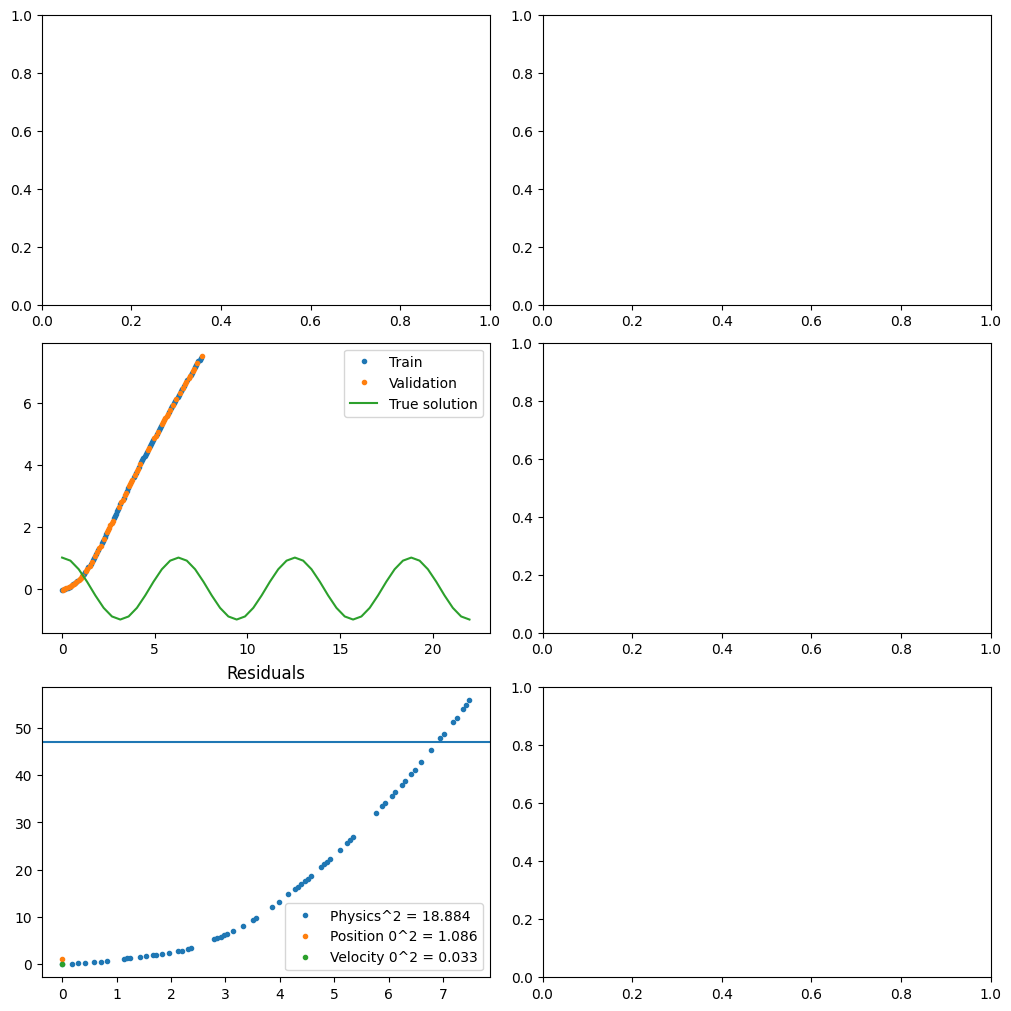

step 100/8000:  Loss: 1.355E+01 ([1.24E+01,1.14E+00,1.65E-02]), val: 11.934 | ([1.00E+00,1.00E+00,1.00E+00])
step 200/8000:  Loss: 9.353E+00 ([8.22E+00,1.13E+00,8.89E-03]), val: 8.262 | ([1.00E+00,1.00E+00,1.00E+00])
step 300/8000:  Loss: 6.599E+00 ([5.53E+00,1.06E+00,4.80E-03]), val: 5.846 | ([1.00E+00,1.00E+00,1.00E+00])
step 400/8000:  Loss: 4.757E+00 ([3.79E+00,9.61E-01,2.43E-03]), val: 4.229 | ([1.00E+00,1.00E+00,1.00E+00])
step 500/8000:  Loss: 3.491E+00 ([2.64E+00,8.49E-01,1.05E-03]), val: 3.121 | ([1.00E+00,1.00E+00,1.00E+00])


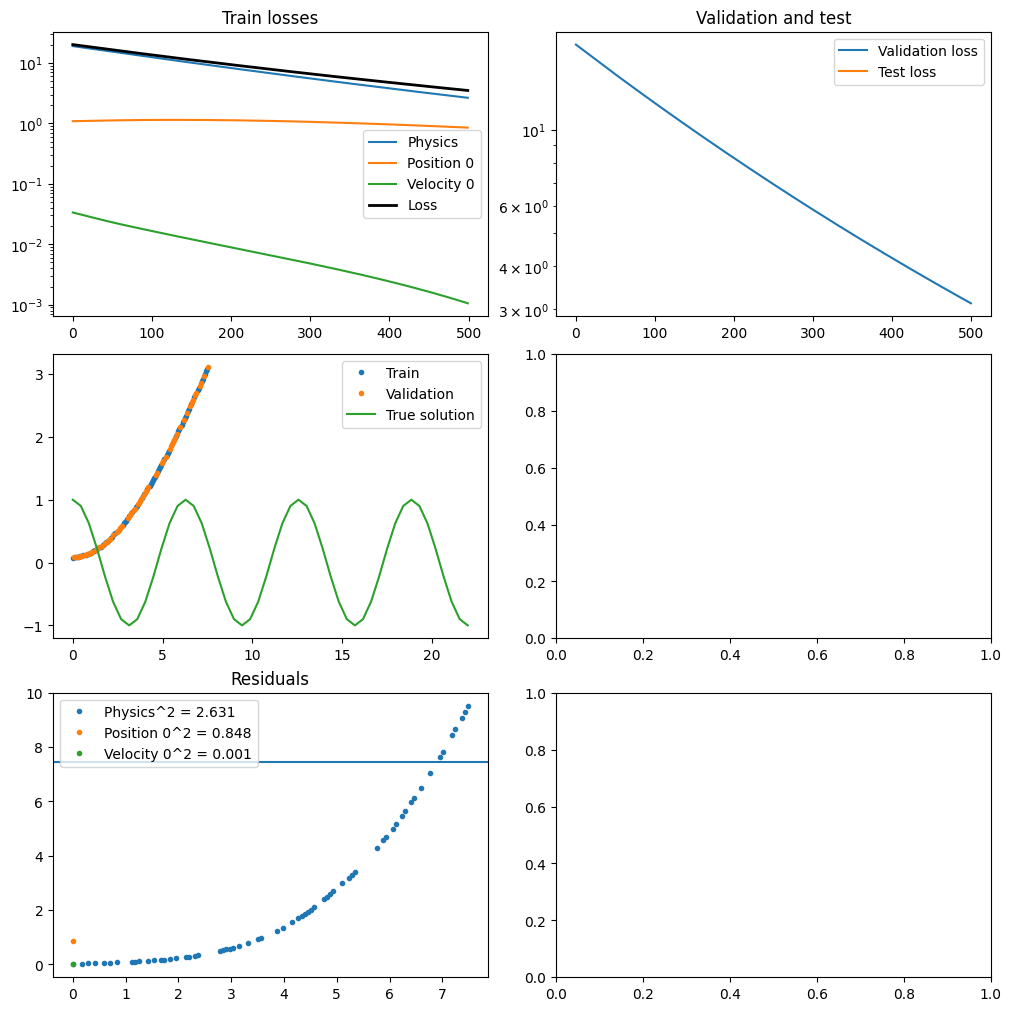

step 600/8000:  Loss: 2.615E+00 ([1.88E+00,7.36E-01,3.35E-04]), val: 2.355 | ([1.00E+00,1.00E+00,1.00E+00])
step 700/8000:  Loss: 2.008E+00 ([1.38E+00,6.31E-01,5.18E-05]), val: 1.823 | ([1.00E+00,1.00E+00,1.00E+00])
step 800/8000:  Loss: 1.587E+00 ([1.05E+00,5.40E-01,1.22E-06]), val: 1.449 | ([1.00E+00,1.00E+00,1.00E+00])
step 900/8000:  Loss: 1.289E+00 ([8.22E-01,4.66E-01,4.94E-05]), val: 1.186 | ([1.00E+00,1.00E+00,1.00E+00])
step 1000/8000:  Loss: 1.075E+00 ([6.67E-01,4.08E-01,1.21E-04]), val: 0.998 | ([1.00E+00,1.00E+00,1.00E+00])


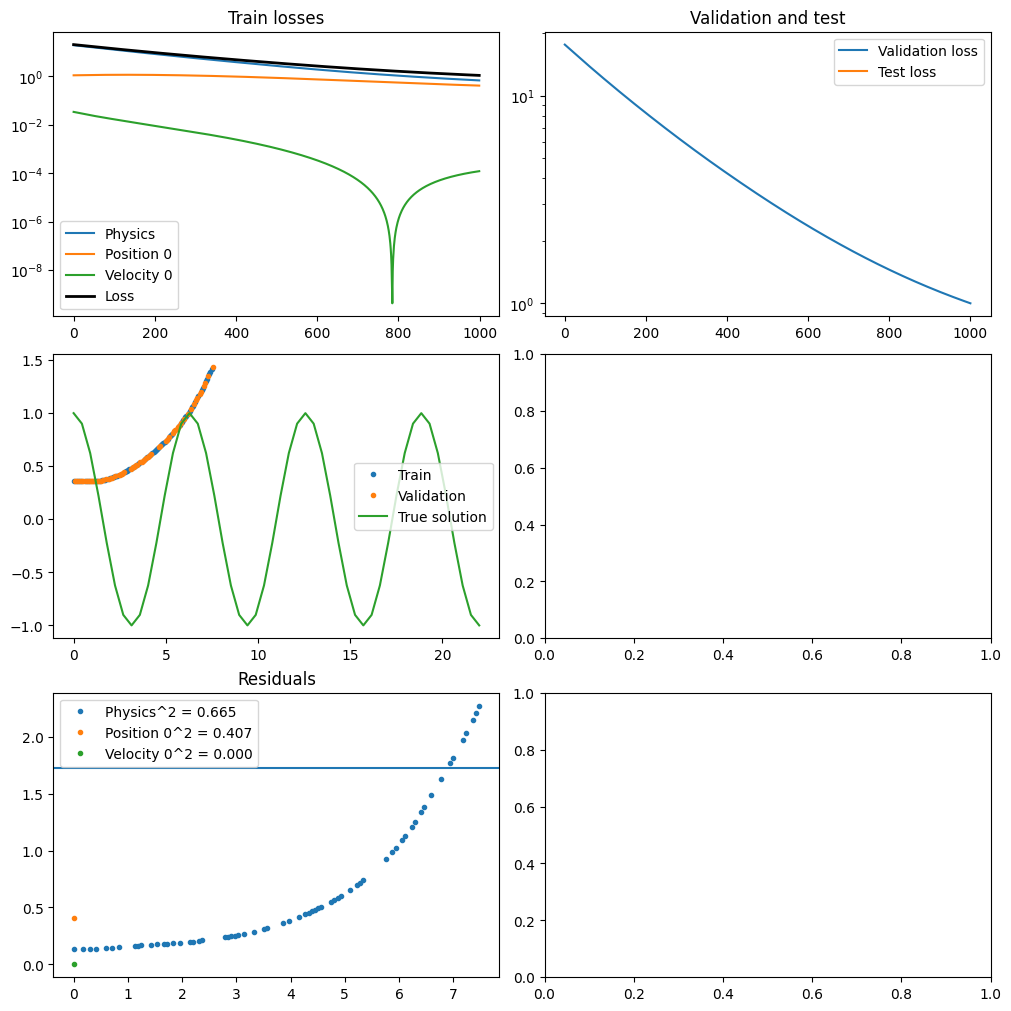

step 1100/8000:  Loss: 9.212E-01 ([5.58E-01,3.63E-01,1.79E-04]), val: 0.863 | ([1.00E+00,1.00E+00,1.00E+00])
step 1200/8000:  Loss: 8.091E-01 ([4.80E-01,3.29E-01,2.14E-04]), val: 0.764 | ([1.00E+00,1.00E+00,1.00E+00])
step 1300/8000:  Loss: 7.255E-01 ([4.22E-01,3.03E-01,2.28E-04]), val: 0.690 | ([1.00E+00,1.00E+00,1.00E+00])
step 1400/8000:  Loss: 6.618E-01 ([3.78E-01,2.84E-01,2.25E-04]), val: 0.635 | ([1.00E+00,1.00E+00,1.00E+00])
step 1500/8000:  Loss: 6.149E-01 ([3.46E-01,2.69E-01,2.14E-04]), val: 0.595 | ([1.00E+00,1.00E+00,1.00E+00])


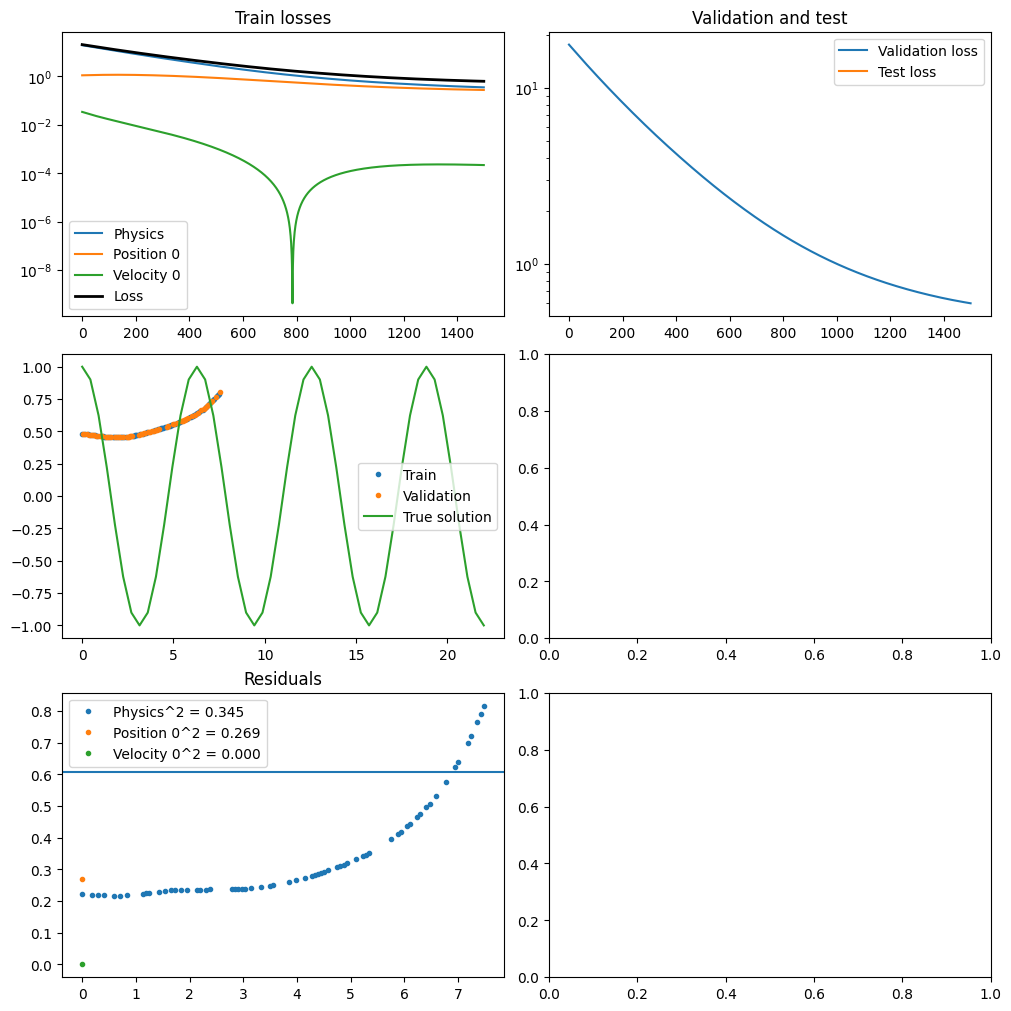

step 1600/8000:  Loss: 5.798E-01 ([3.21E-01,2.58E-01,2.01E-04]), val: 0.565 | ([1.00E+00,1.00E+00,1.00E+00])
step 1700/8000:  Loss: 5.528E-01 ([3.03E-01,2.50E-01,1.90E-04]), val: 0.542 | ([1.00E+00,1.00E+00,1.00E+00])
step 1800/8000:  Loss: 5.315E-01 ([2.88E-01,2.43E-01,1.86E-04]), val: 0.523 | ([1.00E+00,1.00E+00,1.00E+00])
step 1900/8000:  Loss: 5.141E-01 ([2.76E-01,2.38E-01,1.92E-04]), val: 0.508 | ([1.00E+00,1.00E+00,1.00E+00])
step 2000/8000:  Loss: 4.989E-01 ([2.66E-01,2.32E-01,2.14E-04]), val: 0.495 | ([1.00E+00,1.00E+00,1.00E+00])


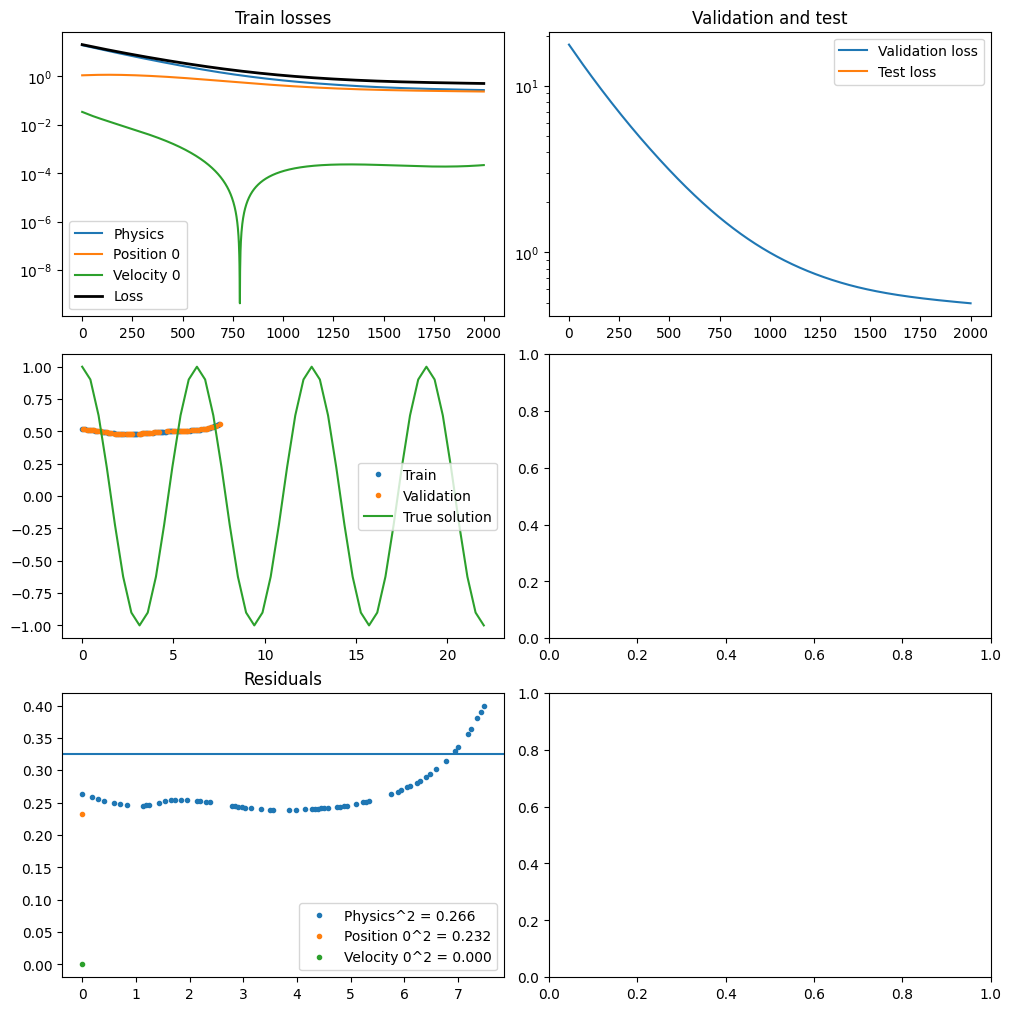

step 2100/8000:  Loss: 4.848E-01 ([2.57E-01,2.27E-01,2.60E-04]), val: 0.483 | ([1.00E+00,1.00E+00,1.00E+00])
step 2200/8000:  Loss: 4.704E-01 ([2.49E-01,2.21E-01,3.44E-04]), val: 0.470 | ([1.00E+00,1.00E+00,1.00E+00])
step 2300/8000:  Loss: 4.546E-01 ([2.41E-01,2.14E-01,4.90E-04]), val: 0.456 | ([1.00E+00,1.00E+00,1.00E+00])
step 2400/8000:  Loss: 4.361E-01 ([2.31E-01,2.04E-01,7.41E-04]), val: 0.439 | ([1.00E+00,1.00E+00,1.00E+00])
Epoch 2501: Performing grid update
step 2500/8000:  Loss: 4.136E-01 ([2.20E-01,1.92E-01,1.19E-03]), val: 0.420 | ([1.00E+00,1.00E+00,1.00E+00])


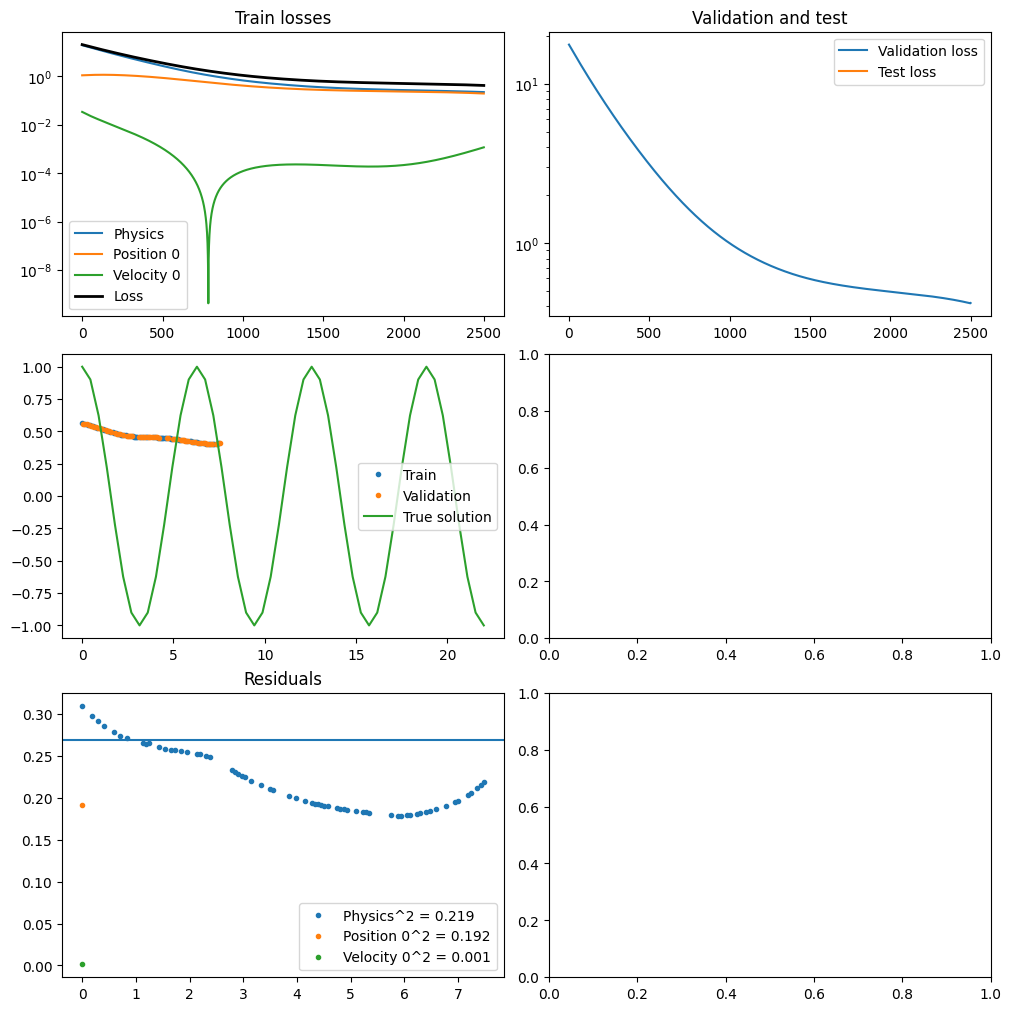

step 2600/8000:  Loss: 2.672E-01 ([1.52E-01,1.14E-01,9.34E-04]), val: 0.298 | ([1.00E+00,1.00E+00,1.00E+00])
step 2700/8000:  Loss: 1.645E-01 ([1.01E-01,6.35E-02,7.11E-07]), val: 0.211 | ([1.00E+00,1.00E+00,1.00E+00])
step 2800/8000:  Loss: 1.036E-01 ([6.91E-02,3.45E-02,2.12E-05]), val: 0.150 | ([1.00E+00,1.00E+00,1.00E+00])
step 2900/8000:  Loss: 7.281E-02 ([5.43E-02,1.84E-02,3.97E-05]), val: 0.108 | ([1.00E+00,1.00E+00,1.00E+00])
step 3000/8000:  Loss: 5.773E-02 ([4.72E-02,1.05E-02,3.97E-05]), val: 0.084 | ([1.00E+00,1.00E+00,1.00E+00])


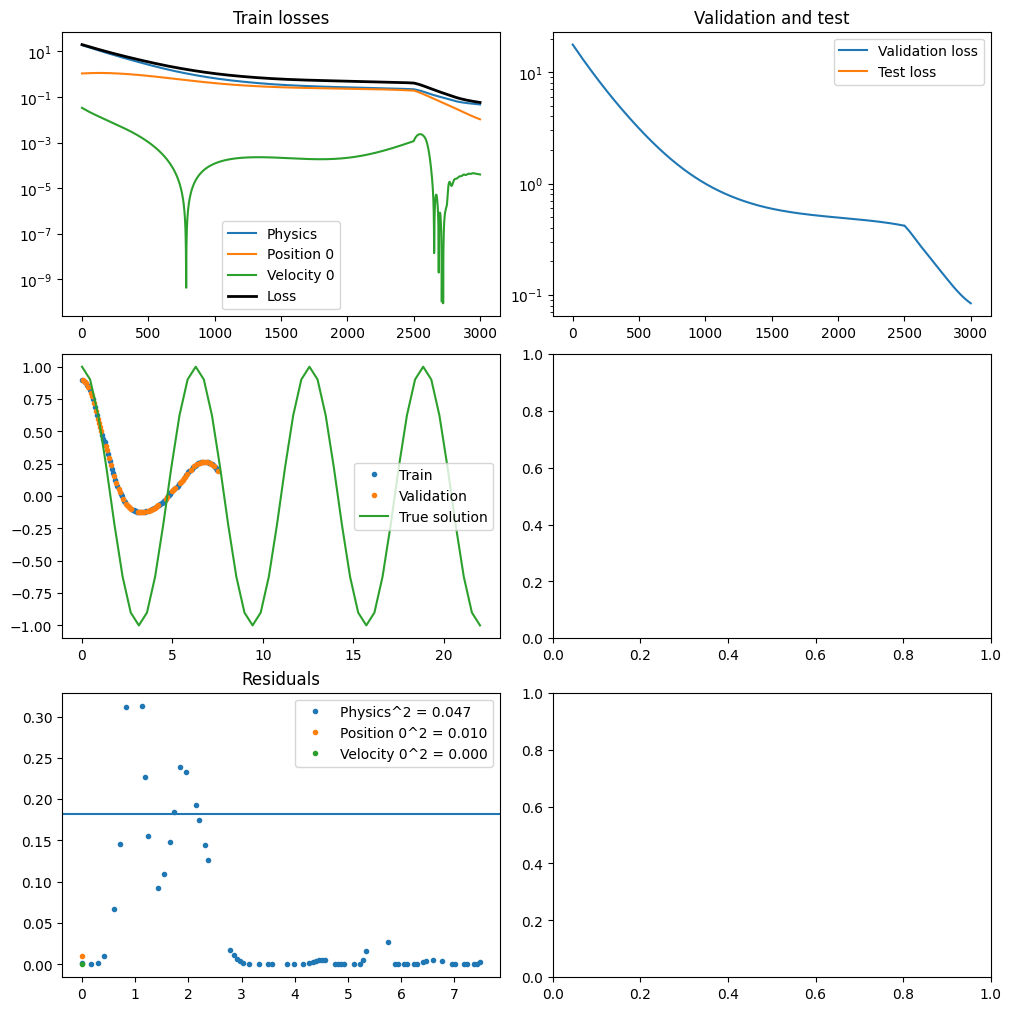

step 3100/8000:  Loss: 4.837E-02 ([4.16E-02,6.73E-03,2.10E-05]), val: 0.072 | ([1.00E+00,1.00E+00,1.00E+00])
step 3200/8000:  Loss: 4.218E-02 ([3.74E-02,4.76E-03,6.21E-06]), val: 0.063 | ([1.00E+00,1.00E+00,1.00E+00])
step 3300/8000:  Loss: 3.758E-02 ([3.39E-02,3.65E-03,5.89E-07]), val: 0.057 | ([1.00E+00,1.00E+00,1.00E+00])
step 3400/8000:  Loss: 3.357E-02 ([3.06E-02,2.96E-03,1.72E-07]), val: 0.053 | ([1.00E+00,1.00E+00,1.00E+00])
step 3500/8000:  Loss: 2.980E-02 ([2.73E-02,2.50E-03,7.87E-07]), val: 0.049 | ([1.00E+00,1.00E+00,1.00E+00])


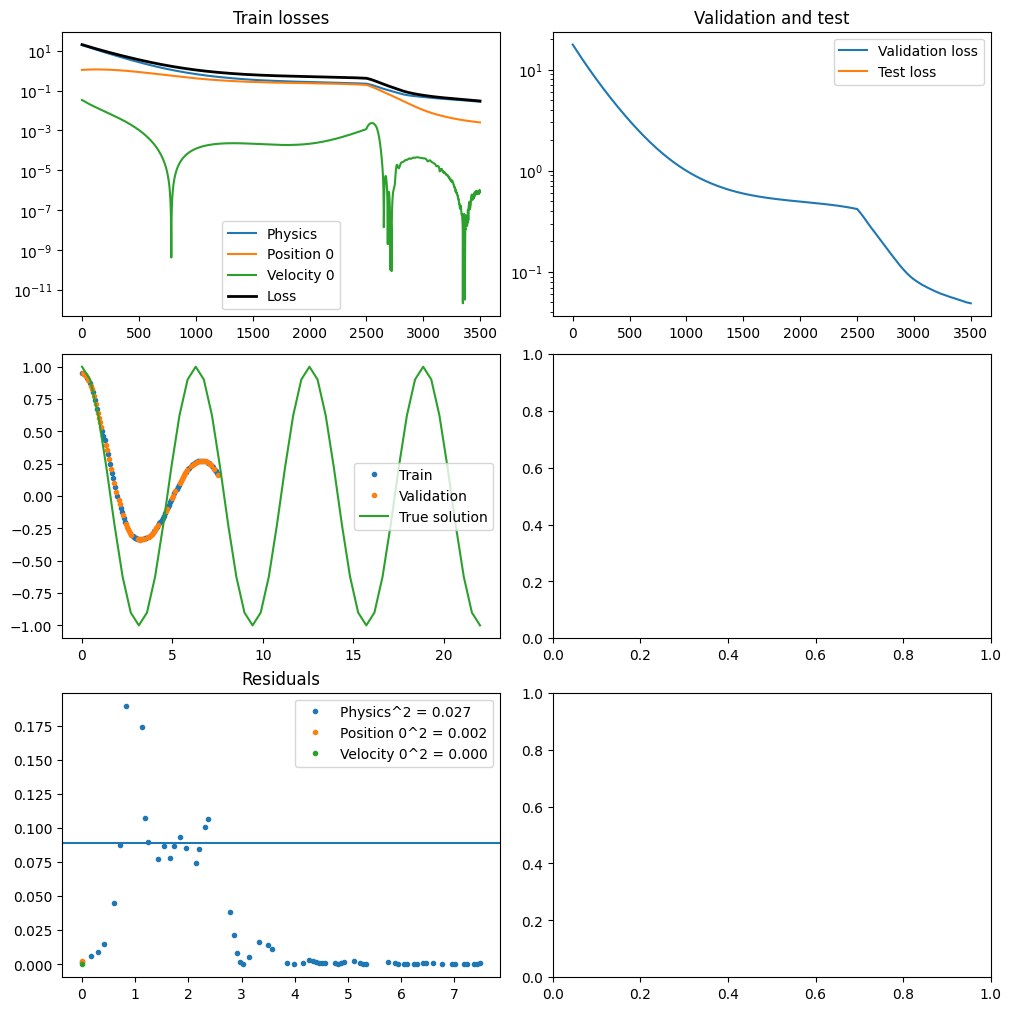

step 3600/8000:  Loss: 2.637E-02 ([2.42E-02,2.16E-03,1.11E-06]), val: 0.046 | ([1.00E+00,1.00E+00,1.00E+00])
step 3700/8000:  Loss: 2.330E-02 ([2.15E-02,1.83E-03,7.97E-07]), val: 0.045 | ([1.00E+00,1.00E+00,1.00E+00])
step 3800/8000:  Loss: 2.053E-02 ([1.90E-02,1.53E-03,6.86E-07]), val: 0.042 | ([1.00E+00,1.00E+00,1.00E+00])
step 3900/8000:  Loss: 1.809E-02 ([1.68E-02,1.28E-03,1.47E-06]), val: 0.039 | ([1.00E+00,1.00E+00,1.00E+00])
step 4000/8000:  Loss: 1.574E-02 ([1.46E-02,1.09E-03,2.69E-06]), val: 0.036 | ([1.00E+00,1.00E+00,1.00E+00])


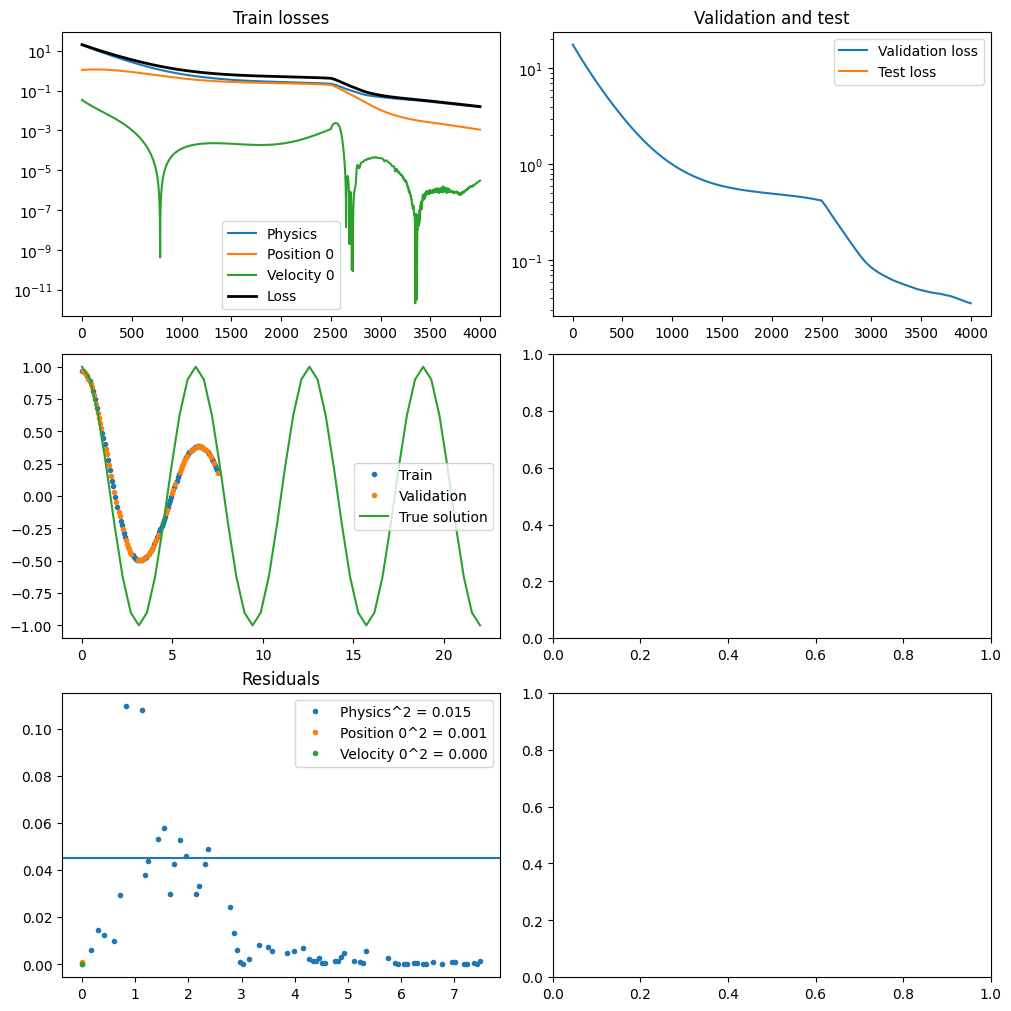

step 4100/8000:  Loss: 1.360E-02 ([1.27E-02,9.09E-04,1.96E-06]), val: 0.034 | ([1.00E+00,1.00E+00,1.00E+00])
step 4200/8000:  Loss: 1.175E-02 ([1.10E-02,7.41E-04,2.65E-06]), val: 0.034 | ([1.00E+00,1.00E+00,1.00E+00])
step 4300/8000:  Loss: 1.009E-02 ([9.49E-03,5.97E-04,3.44E-06]), val: 0.033 | ([1.00E+00,1.00E+00,1.00E+00])
step 4400/8000:  Loss: 8.683E-03 ([8.20E-03,4.79E-04,4.27E-06]), val: 0.032 | ([1.00E+00,1.00E+00,1.00E+00])
step 4500/8000:  Loss: 7.514E-03 ([7.12E-03,3.93E-04,4.15E-06]), val: 0.031 | ([1.00E+00,1.00E+00,1.00E+00])


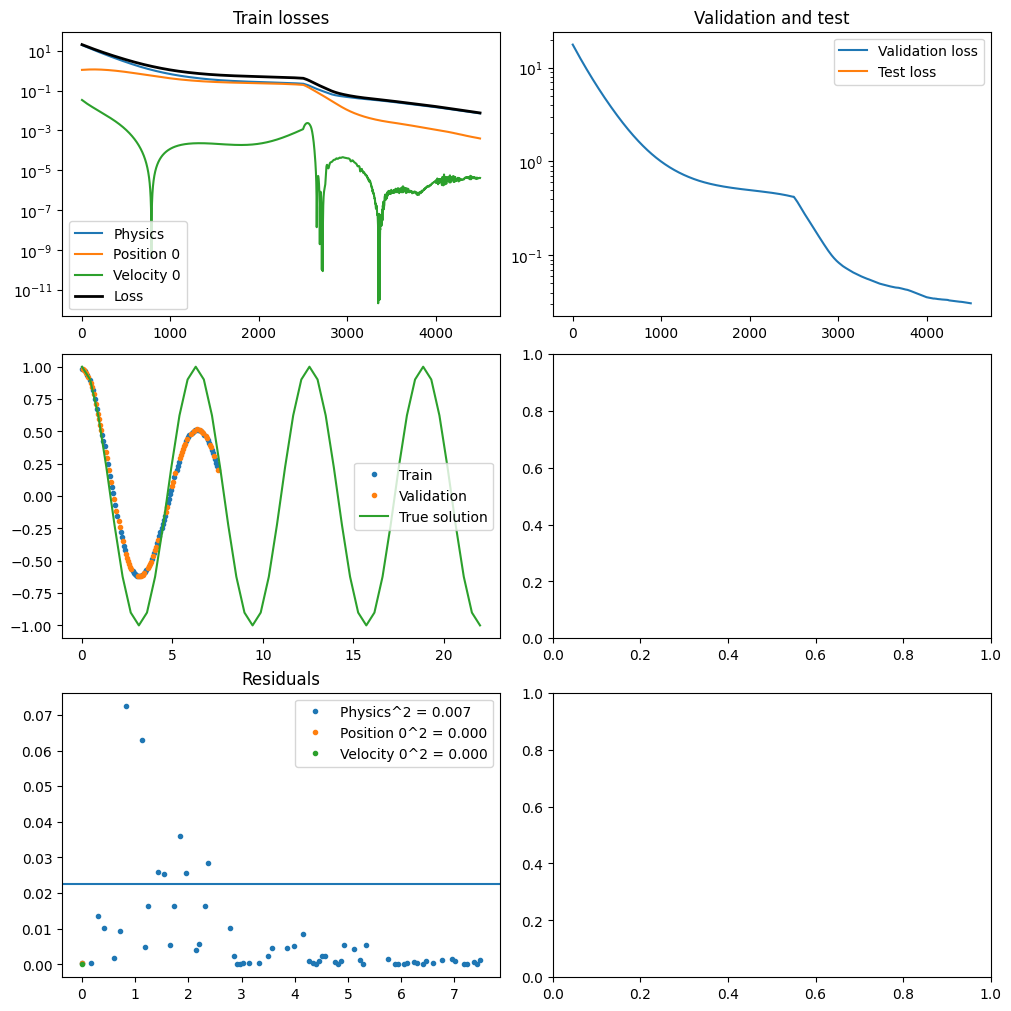

step 4600/8000:  Loss: 6.511E-03 ([6.18E-03,3.21E-04,4.76E-06]), val: 0.030 | ([1.00E+00,1.00E+00,1.00E+00])
step 4700/8000:  Loss: 5.629E-03 ([5.36E-03,2.61E-04,6.19E-06]), val: 0.029 | ([1.00E+00,1.00E+00,1.00E+00])
step 4800/8000:  Loss: 4.853E-03 ([4.63E-03,2.12E-04,7.71E-06]), val: 0.028 | ([1.00E+00,1.00E+00,1.00E+00])
step 4900/8000:  Loss: 4.176E-03 ([4.00E-03,1.72E-04,8.31E-06]), val: 0.027 | ([1.00E+00,1.00E+00,1.00E+00])
step 5000/8000:  Loss: 3.576E-03 ([3.43E-03,1.39E-04,7.79E-06]), val: 0.026 | ([1.00E+00,1.00E+00,1.00E+00])


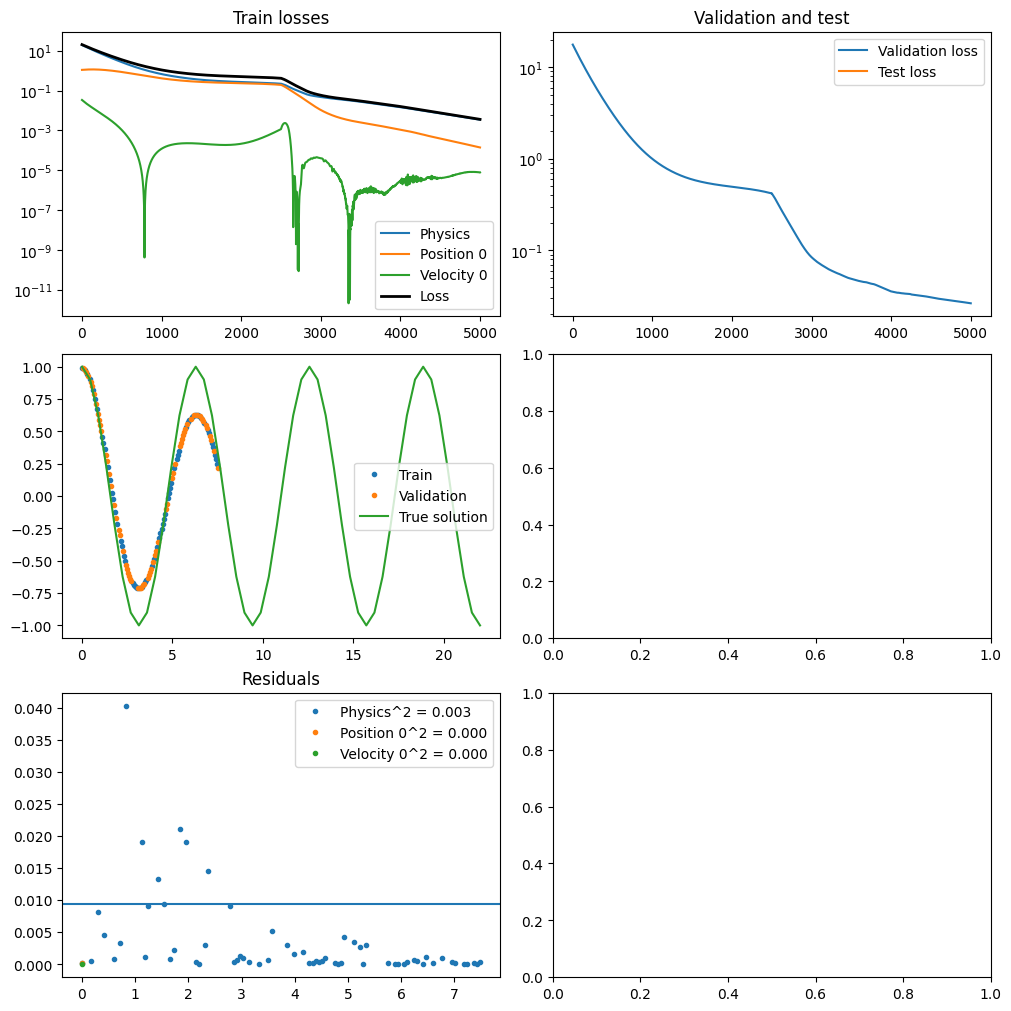

step 5100/8000:  Loss: 3.047E-03 ([2.93E-03,1.13E-04,6.73E-06]), val: 0.026 | ([1.00E+00,1.00E+00,1.00E+00])
step 5200/8000:  Loss: 2.575E-03 ([2.48E-03,9.08E-05,5.65E-06]), val: 0.025 | ([1.00E+00,1.00E+00,1.00E+00])
step 5300/8000:  Loss: 2.175E-03 ([2.10E-03,7.26E-05,4.15E-06]), val: 0.024 | ([1.00E+00,1.00E+00,1.00E+00])
step 5400/8000:  Loss: 1.848E-03 ([1.79E-03,5.62E-05,3.17E-06]), val: 0.024 | ([1.00E+00,1.00E+00,1.00E+00])
Epoch 5501: Performing grid update
step 5500/8000:  Loss: 1.543E-02 ([1.54E-02,7.18E-05,3.77E-07]), val: 0.040 | ([1.00E+00,1.00E+00,1.00E+00])


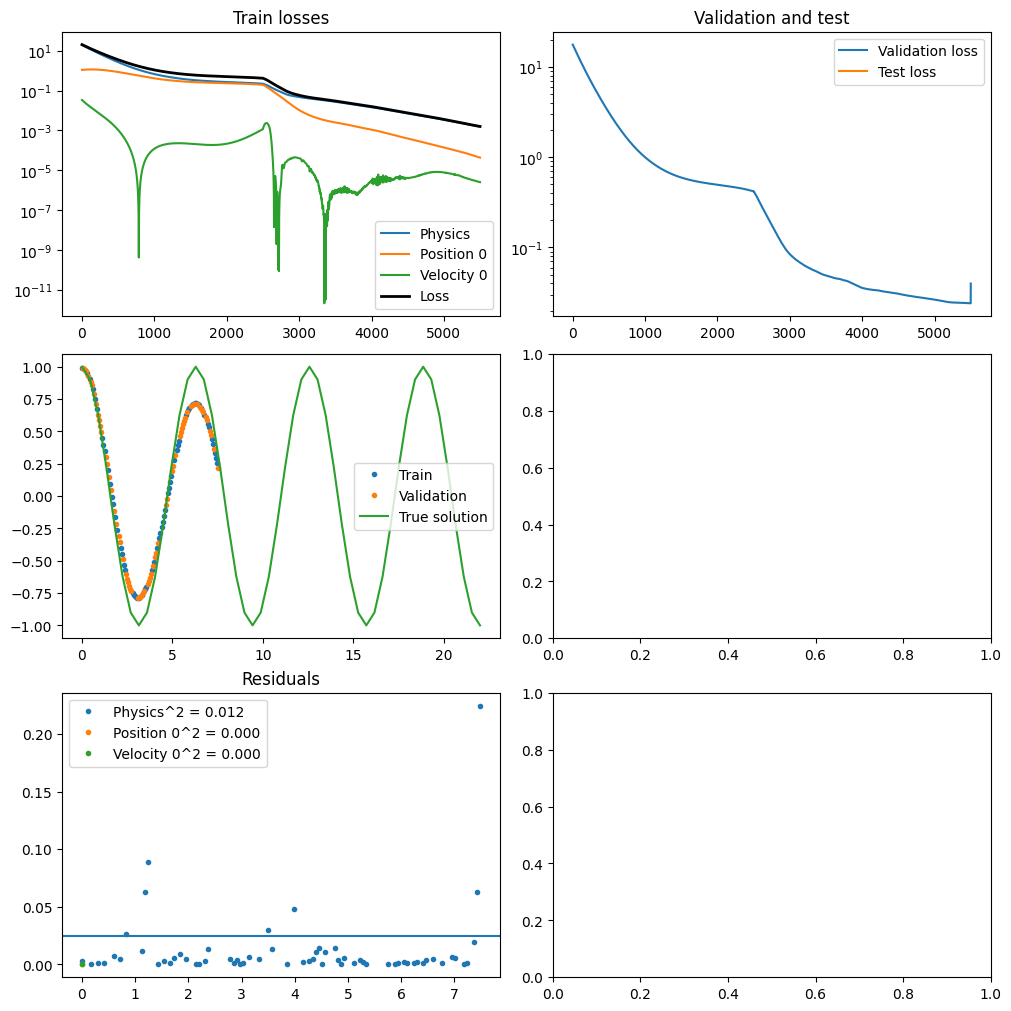

step 5600/8000:  Loss: 9.446E-04 ([9.21E-04,1.97E-05,4.41E-06]), val: 0.025 | ([1.00E+00,1.00E+00,1.00E+00])
step 5700/8000:  Loss: 3.953E-04 ([3.89E-04,5.05E-06,1.22E-06]), val: 0.027 | ([1.00E+00,1.00E+00,1.00E+00])
step 5800/8000:  Loss: 1.762E-04 ([1.74E-04,1.38E-06,4.75E-07]), val: 0.028 | ([1.00E+00,1.00E+00,1.00E+00])
step 5900/8000:  Loss: 9.056E-05 ([9.01E-05,3.35E-07,1.61E-07]), val: 0.028 | ([1.00E+00,1.00E+00,1.00E+00])
step 6000/8000:  Loss: 5.260E-05 ([5.24E-05,8.97E-08,5.72E-08]), val: 0.027 | ([1.00E+00,1.00E+00,1.00E+00])


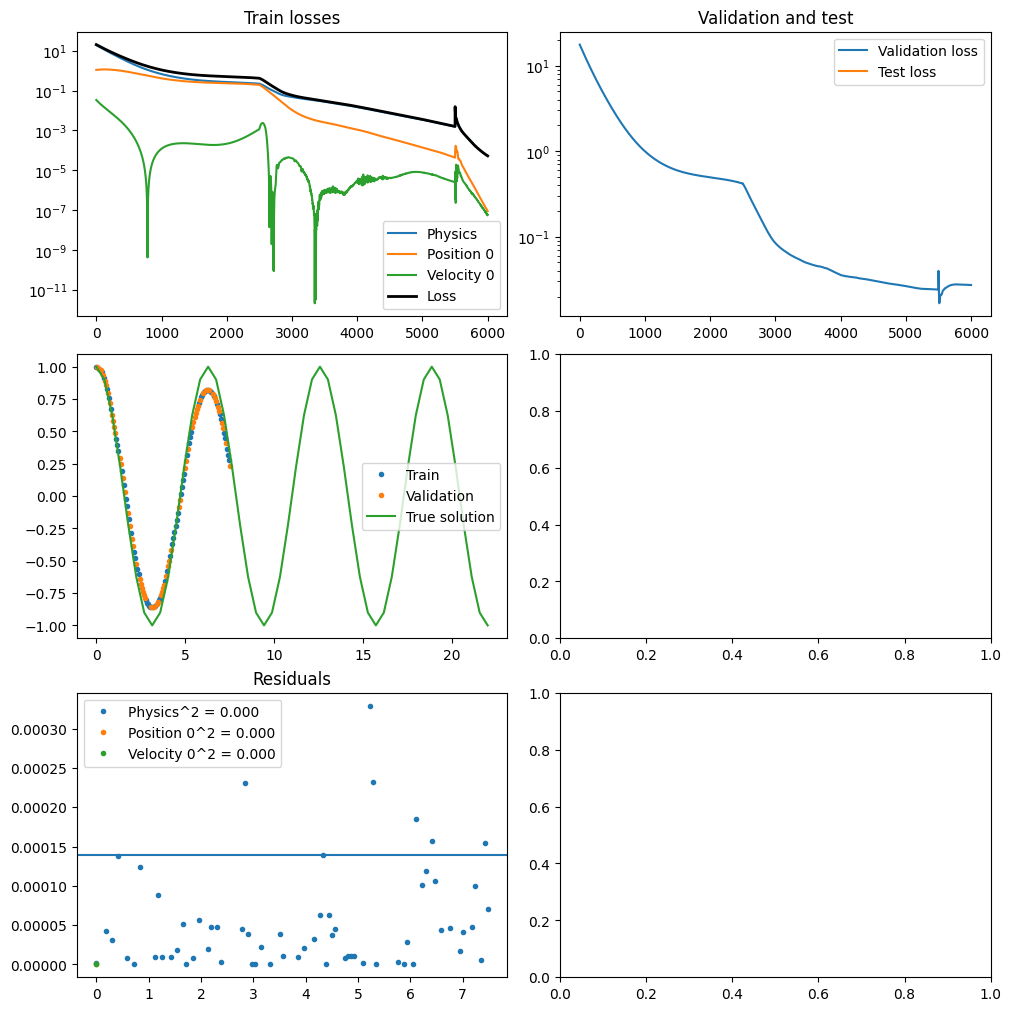

step 6100/8000:  Loss: 3.572E-05 ([3.57E-05,2.69E-08,1.68E-08]), val: 0.027 | ([1.00E+00,1.00E+00,1.00E+00])
step 6200/8000:  Loss: 2.753E-05 ([2.75E-05,9.53E-09,6.01E-09]), val: 0.027 | ([1.00E+00,1.00E+00,1.00E+00])
step 6300/8000:  Loss: 2.279E-05 ([2.28E-05,3.90E-09,2.23E-09]), val: 0.027 | ([1.00E+00,1.00E+00,1.00E+00])
step 6400/8000:  Loss: 1.970E-05 ([1.97E-05,1.97E-09,8.09E-10]), val: 0.027 | ([1.00E+00,1.00E+00,1.00E+00])
step 6500/8000:  Loss: 1.762E-05 ([1.76E-05,1.12E-09,2.73E-10]), val: 0.027 | ([1.00E+00,1.00E+00,1.00E+00])


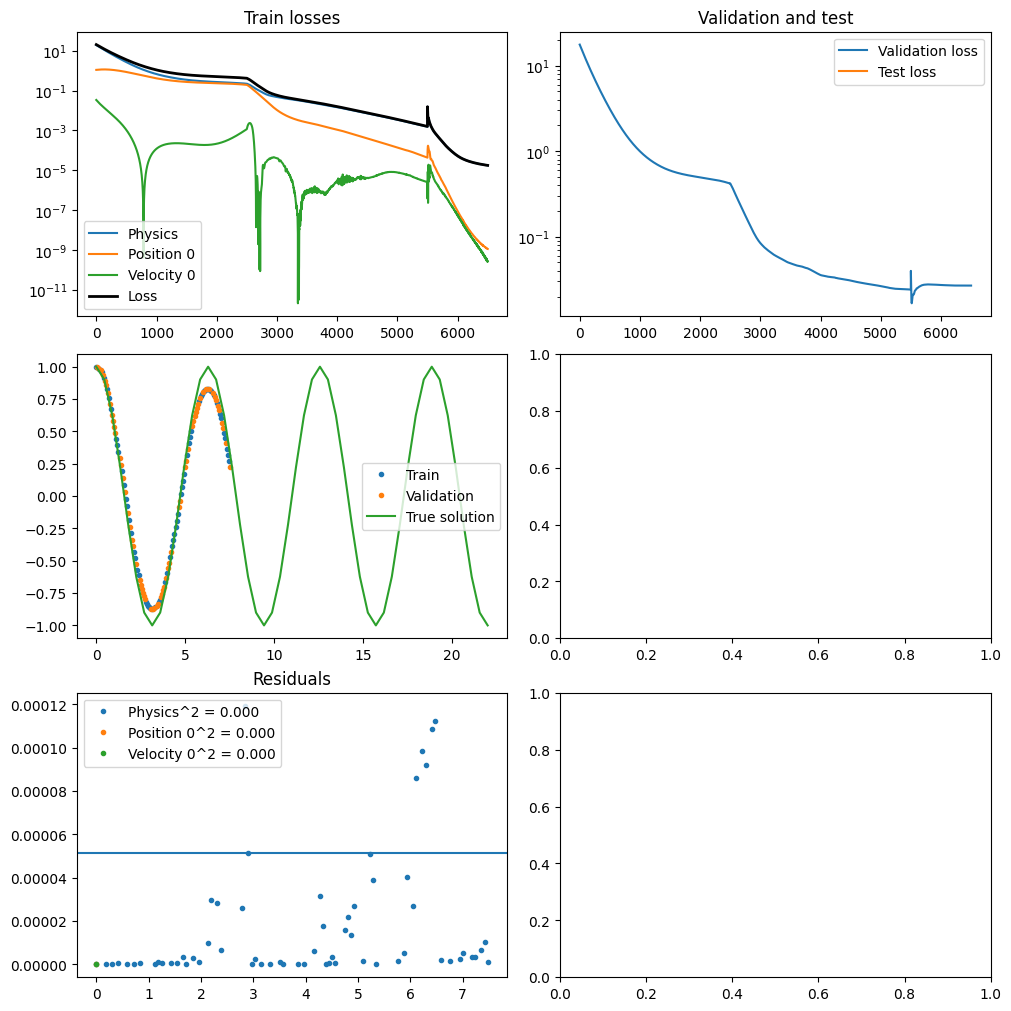

step 6600/8000:  Loss: 1.621E-05 ([1.62E-05,7.26E-10,4.96E-11]), val: 0.027 | ([1.00E+00,1.00E+00,1.00E+00])
step 6700/8000:  Loss: 1.521E-05 ([1.52E-05,5.18E-10,5.83E-12]), val: 0.027 | ([1.00E+00,1.00E+00,1.00E+00])
step 6800/8000:  Loss: 1.446E-05 ([1.45E-05,4.33E-10,2.52E-13]), val: 0.027 | ([1.00E+00,1.00E+00,1.00E+00])
step 6900/8000:  Loss: 1.384E-05 ([1.38E-05,3.68E-10,4.47E-12]), val: 0.027 | ([1.00E+00,1.00E+00,1.00E+00])
step 7000/8000:  Loss: 1.328E-05 ([1.33E-05,3.33E-10,2.09E-11]), val: 0.027 | ([1.00E+00,1.00E+00,1.00E+00])


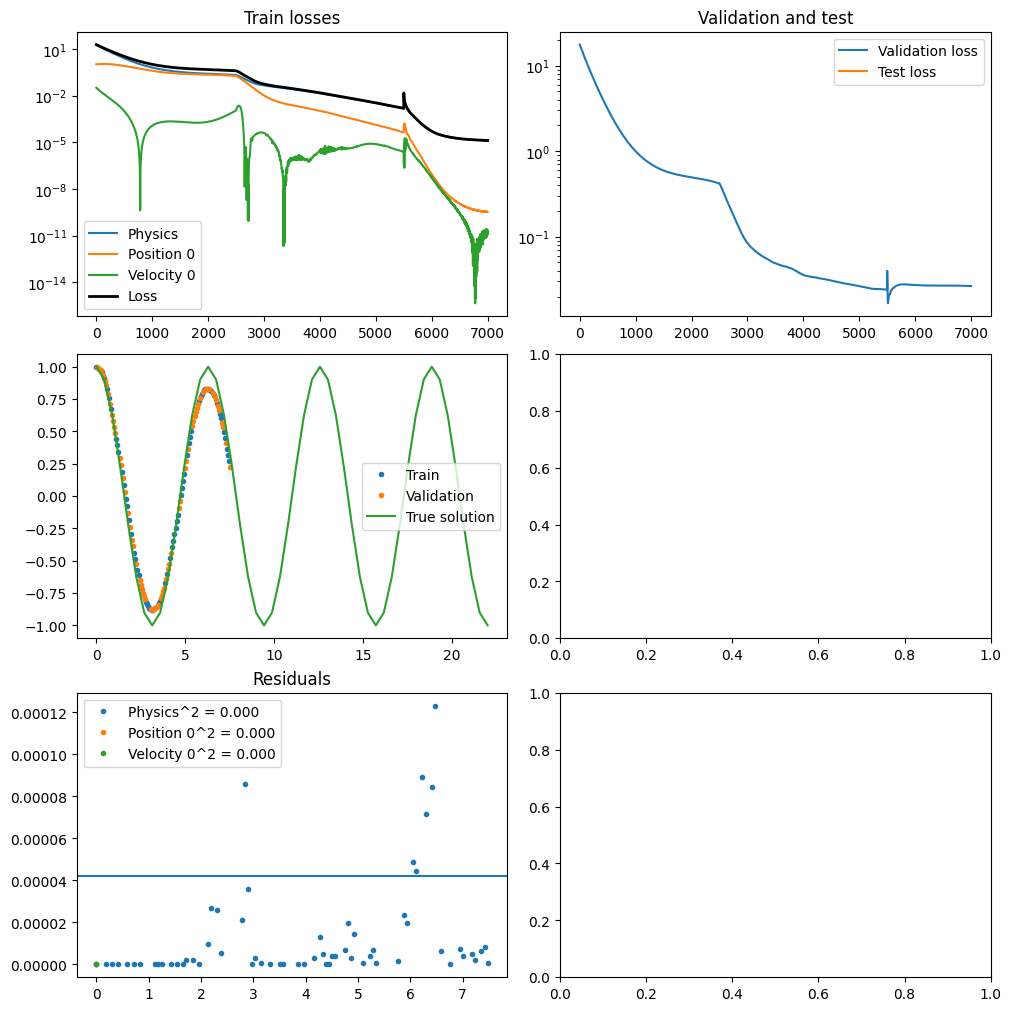

step 7100/8000:  Loss: 1.276E-05 ([1.28E-05,3.11E-10,3.52E-11]), val: 0.026 | ([1.00E+00,1.00E+00,1.00E+00])
step 7200/8000:  Loss: 1.226E-05 ([1.23E-05,3.15E-10,2.94E-11]), val: 0.026 | ([1.00E+00,1.00E+00,1.00E+00])
step 7300/8000:  Loss: 1.176E-05 ([1.18E-05,2.99E-10,1.30E-11]), val: 0.026 | ([1.00E+00,1.00E+00,1.00E+00])
step 7400/8000:  Loss: 1.126E-05 ([1.13E-05,2.99E-10,1.06E-11]), val: 0.026 | ([1.00E+00,1.00E+00,1.00E+00])
step 7500/8000:  Loss: 1.075E-05 ([1.08E-05,2.91E-10,1.04E-11]), val: 0.026 | ([1.00E+00,1.00E+00,1.00E+00])


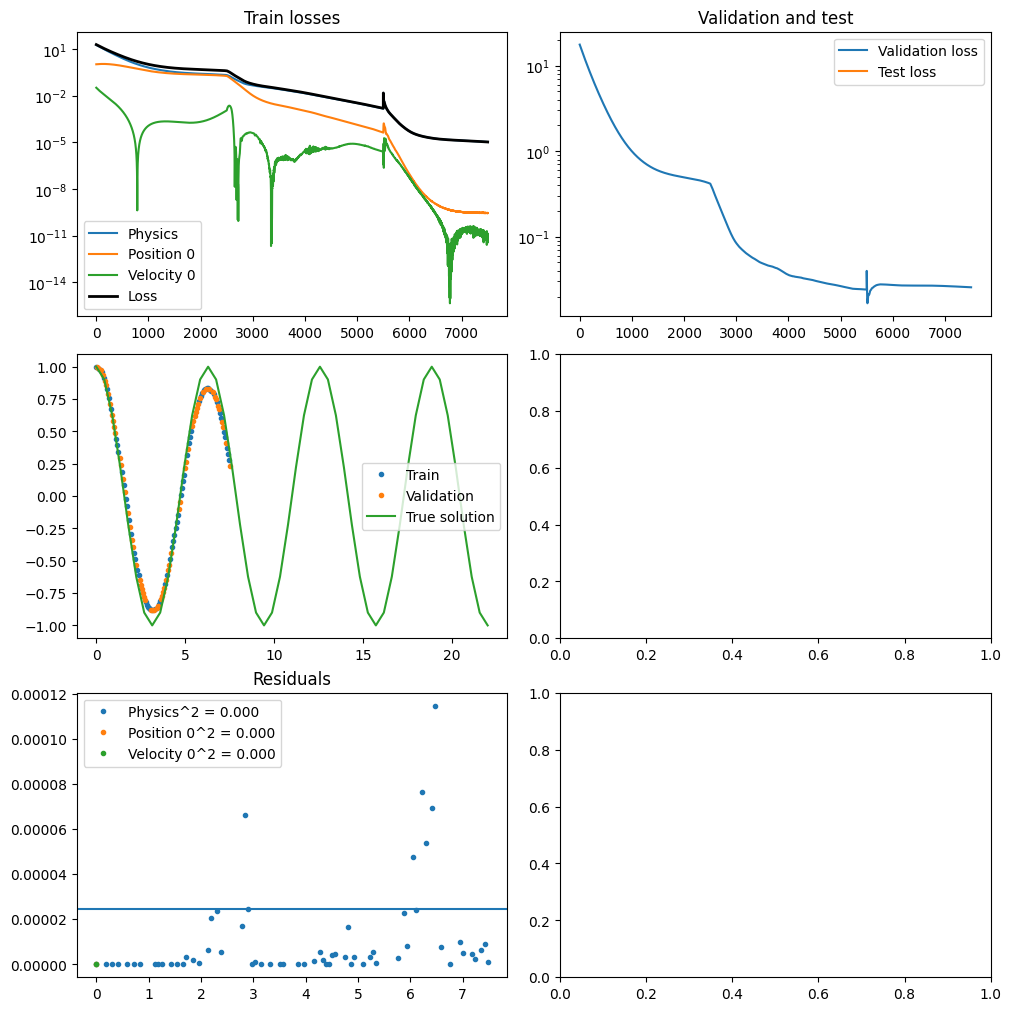

step 7600/8000:  Loss: 1.024E-05 ([1.02E-05,2.75E-10,3.85E-12]), val: 0.025 | ([1.00E+00,1.00E+00,1.00E+00])
step 7700/8000:  Loss: 9.712E-06 ([9.71E-06,2.67E-10,1.81E-12]), val: 0.025 | ([1.00E+00,1.00E+00,1.00E+00])
step 7800/8000:  Loss: 9.174E-06 ([9.17E-06,2.55E-10,1.16E-12]), val: 0.025 | ([1.00E+00,1.00E+00,1.00E+00])
step 7900/8000:  Loss: 8.619E-06 ([8.62E-06,2.40E-10,1.29E-12]), val: 0.025 | ([1.00E+00,1.00E+00,1.00E+00])


In [162]:


variables,losses_train_KAN,losses_val_KAN,times_KAN= train_KAN(variables,losses,W,names,collocs,datas,sigmas,learning_rate=5e-4,steps = 8000,print_step =100,plot_step = 500,grid_upds = {0 : 3, 2500: 5, 5500: 10, 10000: 30})

# MLP

In [87]:
from typing import Sequence, Callable, Dict,Any, Tuple

In [163]:
class pinn_model_mlp(nn.Module):
    features: Sequence[int]
    afs: Sequence
    dtype: Any = jnp.float32
    #a: jnp.float32 = 0.1
    def setup(self):
        # Define the layers.
        self.layers = [nn.Dense(features=feat, use_bias=True, dtype=self.dtype, kernel_init=nn.initializers.lecun_normal()) for feat in self.features]

    def __call__(self, x):
        # Execute the layers.
        for i, lyr in enumerate(self.layers):
            x = lyr(x)
            if i < len(self.layers) - 1:
                x = self.afs[i](x)
                #x = nn.tanh(x)
        return x

In [174]:
model_mlp=pinn_model_mlp([10,10,1],afs=[nn.tanh,nn.tanh])
tabulate_fn=nn.tabulate(model_mlp, jax.random.PRNGKey(11))
tt = jnp.linspace(0,3,5).reshape(-1,1)
table=tabulate_fn(tt)
print(table)
key1,key2= jax.random.split(jax.random.PRNGKey(np.random.randint(10000)),num=2)
params_mlp=model_mlp.init(key2,tt)


                             pinn_model_mlp Summary                             
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ path     ┃ module         ┃ inputs        ┃ outputs       ┃ params           ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│          │ pinn_model_mlp │ float32[5,1]  │ float32[5,1]  │                  │
├──────────┼────────────────┼───────────────┼───────────────┼──────────────────┤
│ layers_0 │ Dense          │ float32[5,1]  │ float32[5,10] │ bias:            │
│          │                │               │               │ float32[10]      │
│          │                │               │               │ kernel:          │
│          │                │               │               │ float32[1,10]    │
│          │                │               │               │                  │
│          │                │               │               │ 20 (80 B)        │
├──────────┼───────────────

In [165]:
# learning_rate = 5e-4
# steps = 8000

# print_step =100 
# plot_step = 500
# optimizer = optax.adam(learning_rate=learning_rate)
# opt_state = optimizer.init(params_mlp)
# #losses_test=[]
# losses_val_mlp=[]
# W=W0
# losses_train_mlp = np.zeros((steps,len(W)))

# L,L_no_W,L_W = create_los_mean(losses,datas,sigmas)

#@jax.jit
def create_los_mean_mlp(losses, datas, sigmas):
    @jax.jit
    def L(params, collocs, W):
        los=0.0
        for loss, colloc, data, sigma, w in zip(losses, collocs, datas, sigmas, W):
            los+=w*jnp.mean(loss(params, colloc, data, sigma))
        return los

    @jax.jit
    def L_no_W(params, collocs):
        
        los=[]
        for loss, colloc, data, sigma in zip(losses, collocs, datas, sigmas):
            los.append(jnp.mean(loss(params, colloc, data, sigma)))
        return jnp.array(los)
    @jax.jit
    def L_W(params, collocs,W):
        los=[]
        for loss, colloc, data, sigma, w in zip(losses, collocs, datas, sigmas, W):
            los.append(w*jnp.mean(loss(params, colloc, data, sigma)))
        return jnp.array(los)
    return L,L_no_W,L_W


def train_mlp(params,losses,W,names,collocs,datas,sigmas,learning_rate=5e-4,steps = 8000,print_step =100,plot_step = 500 ):
    optimizer = optax.adam(learning_rate=learning_rate)
    opt_state = optimizer.init(params)

    L,L_no_W,L_W = create_los_mean_mlp(losses,datas,sigmas)

    # @jax.jit
    # def train_step(params, opt_state, collocs, W, state):
        
    #     loss, grads = jax.value_and_grad(L)(params, collocs, W, state)
        
    #     updates, opt_state = optimizer.update(grads, opt_state, params)
    #     params = optax.apply_updates(params, updates)
        
    #     return params_mlp, opt_state, loss

    losses_val=[]
    losses_train = np.zeros((steps,len(W)))
    times=[]
    start_time=time.time()
    for step in range(steps):
        #print(collocs)
        loss_val, grads = jax.value_and_grad(L)(params,collocs,W)
    
        updates, opt_state = optimizer.update(grads, opt_state)
        params = optax.apply_updates(params, updates)
        times.append(time.time()-start_time)
    
        #params, opt_state, loss = train_step(params, opt_state, collocs, W, state)
    
        val_loss = jnp.sum(L_no_W(params,collocs_val))
        losses_train[step,:] = L_no_W(params,collocs)
        #losses_test.append(test_loss)
        losses_val.append(val_loss)
    
        if step % print_step == 0:
                #comps = np.array(loss_components(params,colloc_physics,BC_colloc, BC_data1,BC_sigma1, BC_colloc,BC_data2,BC_sigma2))
                print(f"step {step}/{steps}:  Loss: {loss_val:.3E} ({np.array2string(losses_train[step,:],separator=',', formatter={'float_kind':lambda x: '%.2E' % x})}), val: {val_loss:.3f} | ({np.array2string(W,separator=',', formatter={'float_kind':lambda x: '%.2E' % x})})")
    
    
        if (step % plot_step ==0):
                fig = plt.figure(layout="constrained",figsize=(10,10))
                ax = fig.subplot_mosaic(
                [
                        ["loss", "test"],
                        ["sol", "p"],
                        ['res', 'ntk']
                ],
                )
                if step>0:
                        ax['loss'].plot(losses_train[:step,:],label=names)
                        ax['loss'].plot(np.sum(losses_train[:step,:],axis=1),linewidth=2, color='black',label='Loss')
                        ax['loss'].legend()
    
                        ax['test'].plot(losses_val,label='Validation loss')
                        ax['test'].plot(losses_test,label='Test loss')
                        ax['test'].legend()
    
                
                        ax['loss'].set(yscale='log',title='Train losses')
                        ax['test'].set(yscale='log',title="Validation and test")
    
                x=model_mlp.apply(params,colloc_physics)
                ax['sol'].plot(colloc_physics,x.flatten(),'.',label="Train")
    
        #     x=model_mlp.apply(variables,colloc_physics_test)
        #     ax['sol'].plot(colloc_physics_test,x.flatten(),'.',label='Test')
    
                x=model_mlp.apply(params,colloc_physics_val)
                ax['sol'].plot(colloc_physics_val,x.flatten(),'.',label='Validation')
    
                true_sol_t=np.linspace(0,7*np.pi)
                true_sol=np.cos(true_sol_t)
                ax['sol'].plot(true_sol_t,true_sol,label="True solution")
                ax['sol'].legend()
                for (los,colloc,name,data,sigma) in zip(losses,collocs,names,datas,sigmas):
                        if name != 'Penalty':
                                _loss_points=los(params,colloc,data,sigma)
                                ax['res'].plot(colloc,_loss_points,'.',label=f"{name}^2 = {jnp.mean(_loss_points):.3f}")
                                if name == "Physics":
                                        ax['res'].axhline(np.quantile(_loss_points,q=[0.9]))
    
                ax['res'].set(title="Residuals")
                ax['res'].legend()
    
                # for p in trace_params:
                #         ax['p'].plot(params_log[p],label=p)
                #ax['p'].set(title="Parameters")
                #ax['p'].legend()
    
                plt.show()
    return params,losses_train,losses_val,times

In [166]:
m=1.0
k=1.0
def physics_mlp(params,colloc):
  def x(t): return model_mlp.apply(params,t)
  ddx = _grad(x,0,2)
  return m*ddx(colloc)+k*x(colloc)

def physics_grad_mlp(params,colloc):
    def x(t): return model_mlp.apply(params,t)
    ddx = _grad(x,0,2)
    def eq(t): return m*ddx(t)+k*x(t)
    deq = _grad(eq,0,1)
    return deq(colloc)

def physics_loss_mlp(params,colloc,data,sigma):
    #def sigma(t): return model_mlp.apply(params,t)[1]
    #sigma=params['params']['sigma']
    return physics_mlp(params,colloc)**2

def position_data_loss_mlp(params,colloc,data,sigma):
    def x(t): return model_mlp.apply(params,t)
    return  (x(colloc)-data)**2

def velocity_data_loss_mlp(params,colloc,data,sigma):
    def x(t): return model_mlp.apply(params,t)
    dx = _grad(x,0,1)
    return  (dx(colloc)-data)**2

collocs = [colloc_physics, BC_colloc, BC_colloc, colloc_physics] #this will change inside training
collocs_val = collocs.copy(); collocs_val[0]=colloc_physics_val
datas = [None, BC_data1, BC_data2, None]
sigmas = [None, BC_sigma1, BC_sigma2, None]
names = ['Physics','Position 0', 'Velocity 0']

losses_mlp = [physics_loss_mlp, position_data_loss_mlp, velocity_data_loss_mlp]
W0= np.ones(len(losses))


In [167]:
L,L_no_W,L_W = create_los_mean_mlp(losses_mlp,datas,sigmas)

In [168]:
L(params_mlp,collocs,W0)

Array(3.9130538, dtype=float32)

step 0/8000:  Loss: 2.198E-06 ([6.01E-01,9.95E-01,2.25E+00]), val: 3.905 | ([1.00E+00,1.00E+00,1.00E+00])


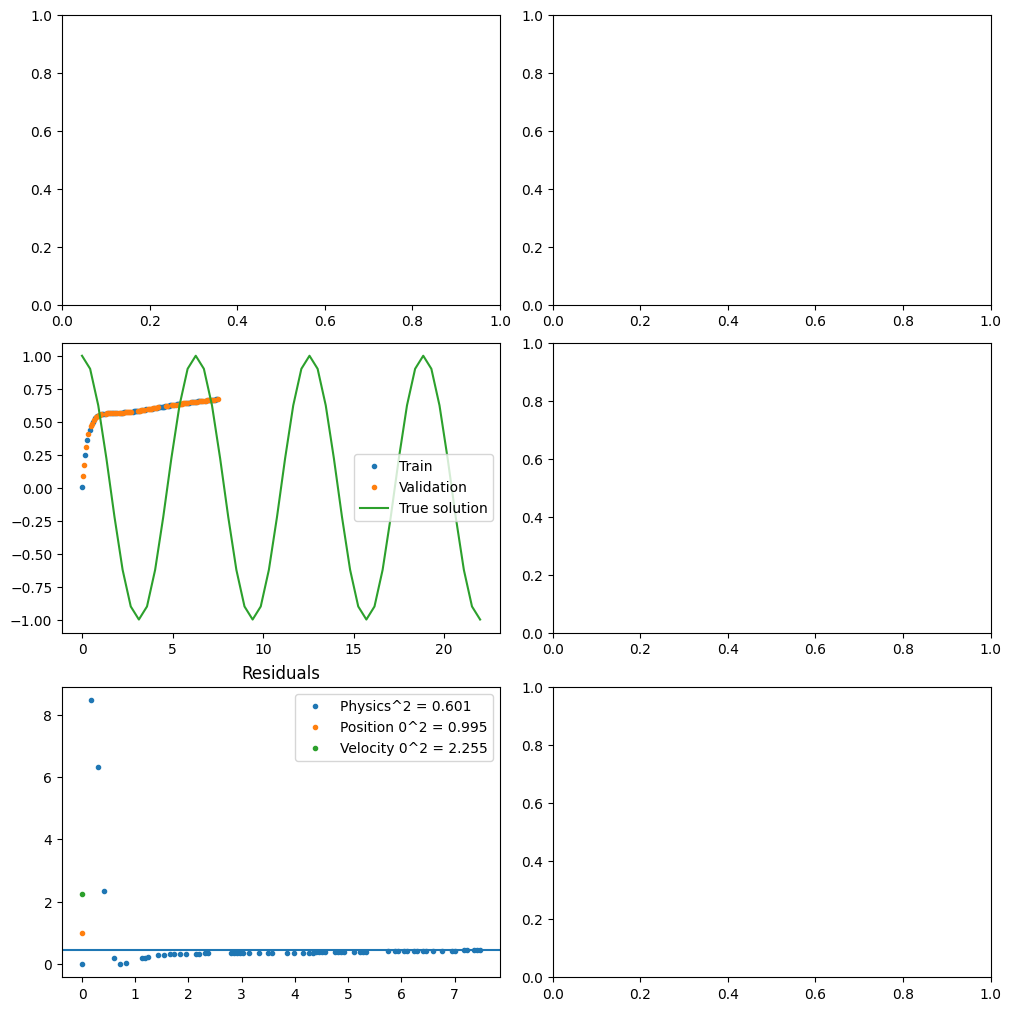

step 100/8000:  Loss: 2.198E-06 ([5.69E-02,5.57E-01,8.63E-02]), val: 0.725 | ([1.00E+00,1.00E+00,1.00E+00])
step 200/8000:  Loss: 2.198E-06 ([5.89E-02,2.70E-01,7.71E-04]), val: 0.350 | ([1.00E+00,1.00E+00,1.00E+00])
step 300/8000:  Loss: 2.198E-06 ([8.21E-02,1.24E-01,3.19E-03]), val: 0.237 | ([1.00E+00,1.00E+00,1.00E+00])
step 400/8000:  Loss: 2.198E-06 ([8.71E-02,5.82E-02,2.83E-03]), val: 0.178 | ([1.00E+00,1.00E+00,1.00E+00])
step 500/8000:  Loss: 2.198E-06 ([8.28E-02,2.93E-02,1.62E-03]), val: 0.143 | ([1.00E+00,1.00E+00,1.00E+00])


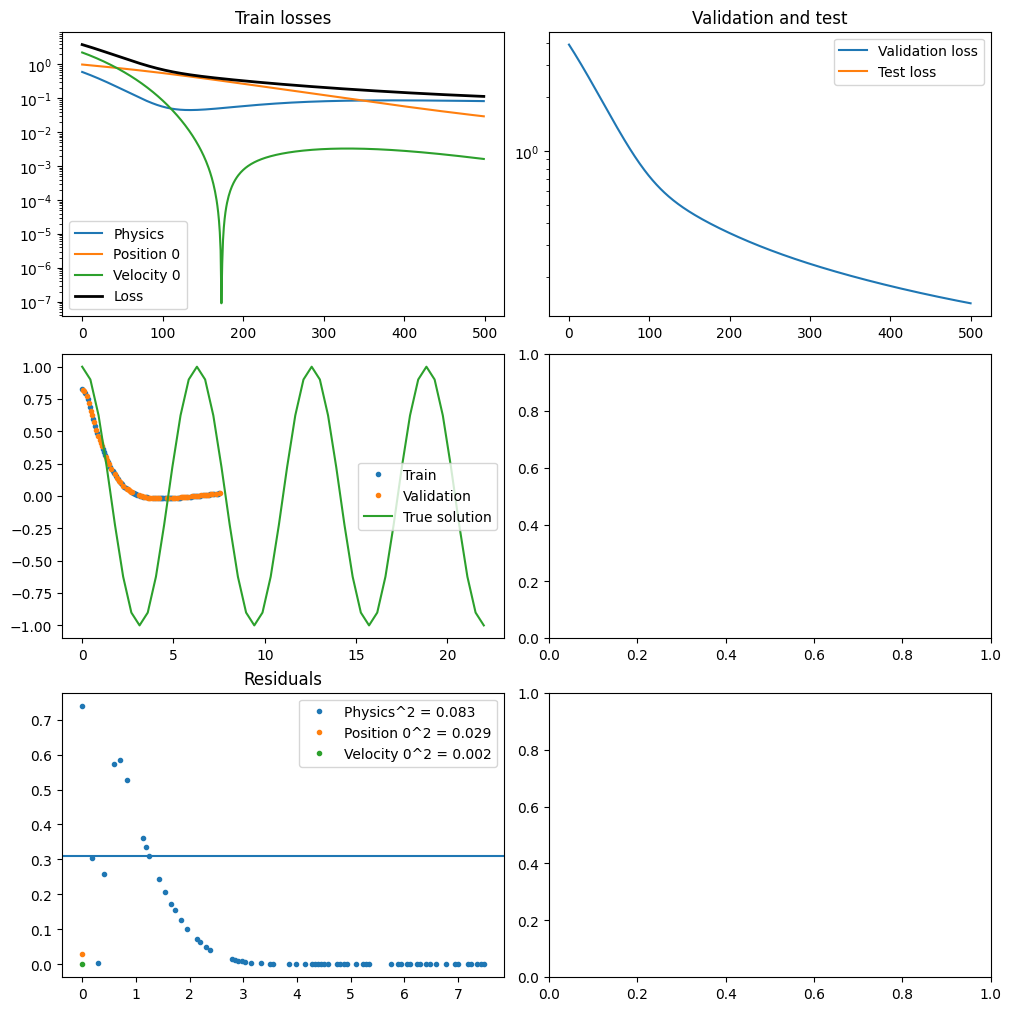

step 600/8000:  Loss: 2.198E-06 ([7.71E-02,1.69E-02,8.15E-04]), val: 0.120 | ([1.00E+00,1.00E+00,1.00E+00])
step 700/8000:  Loss: 2.198E-06 ([7.26E-02,1.14E-02,4.43E-04]), val: 0.105 | ([1.00E+00,1.00E+00,1.00E+00])
step 800/8000:  Loss: 2.198E-06 ([6.95E-02,8.78E-03,2.88E-04]), val: 0.096 | ([1.00E+00,1.00E+00,1.00E+00])
step 900/8000:  Loss: 2.198E-06 ([6.77E-02,7.43E-03,2.23E-04]), val: 0.090 | ([1.00E+00,1.00E+00,1.00E+00])
step 1000/8000:  Loss: 2.198E-06 ([6.66E-02,6.63E-03,1.93E-04]), val: 0.086 | ([1.00E+00,1.00E+00,1.00E+00])


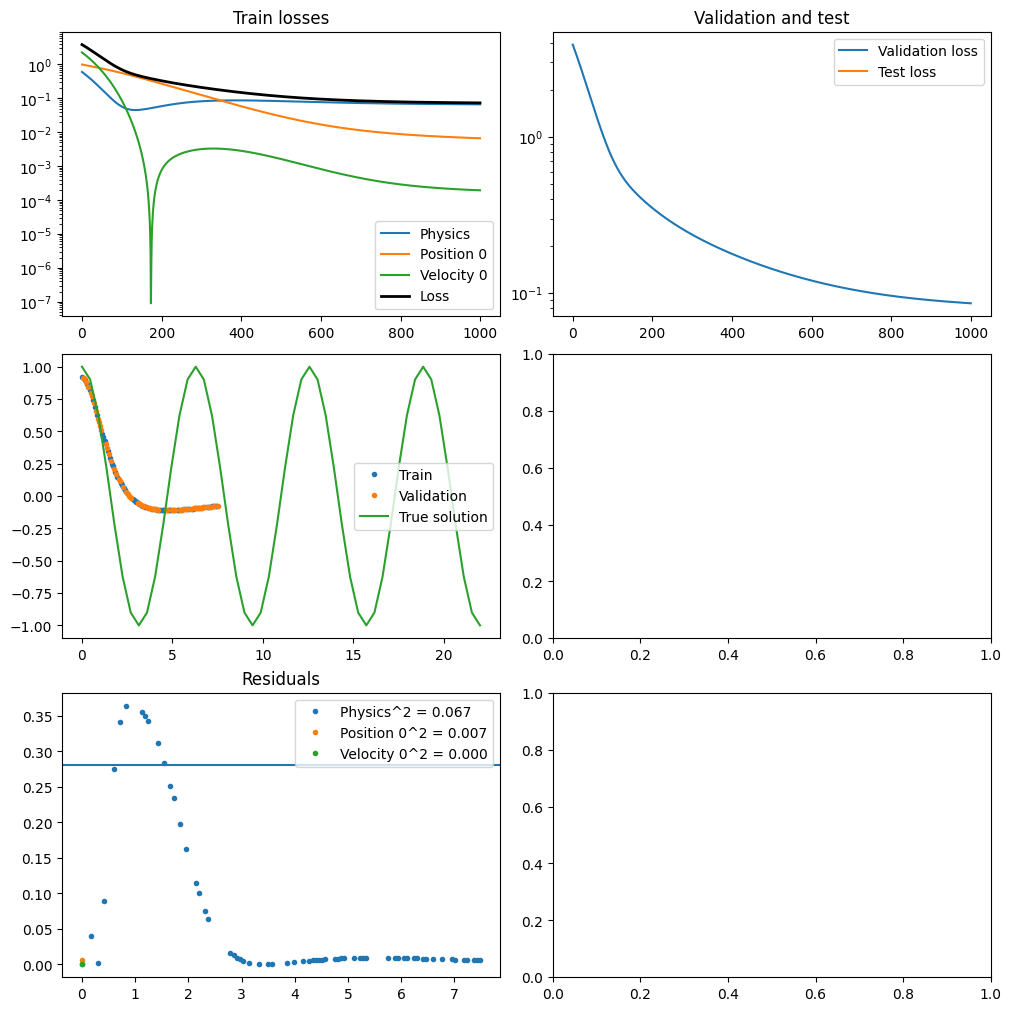

step 1100/8000:  Loss: 2.198E-06 ([6.58E-02,6.11E-03,1.79E-04]), val: 0.083 | ([1.00E+00,1.00E+00,1.00E+00])
step 1200/8000:  Loss: 2.198E-06 ([6.53E-02,5.76E-03,1.71E-04]), val: 0.081 | ([1.00E+00,1.00E+00,1.00E+00])
step 1300/8000:  Loss: 2.198E-06 ([6.47E-02,5.51E-03,1.66E-04]), val: 0.080 | ([1.00E+00,1.00E+00,1.00E+00])
step 1400/8000:  Loss: 2.198E-06 ([6.42E-02,5.33E-03,1.62E-04]), val: 0.078 | ([1.00E+00,1.00E+00,1.00E+00])
step 1500/8000:  Loss: 2.198E-06 ([6.36E-02,5.19E-03,1.58E-04]), val: 0.077 | ([1.00E+00,1.00E+00,1.00E+00])


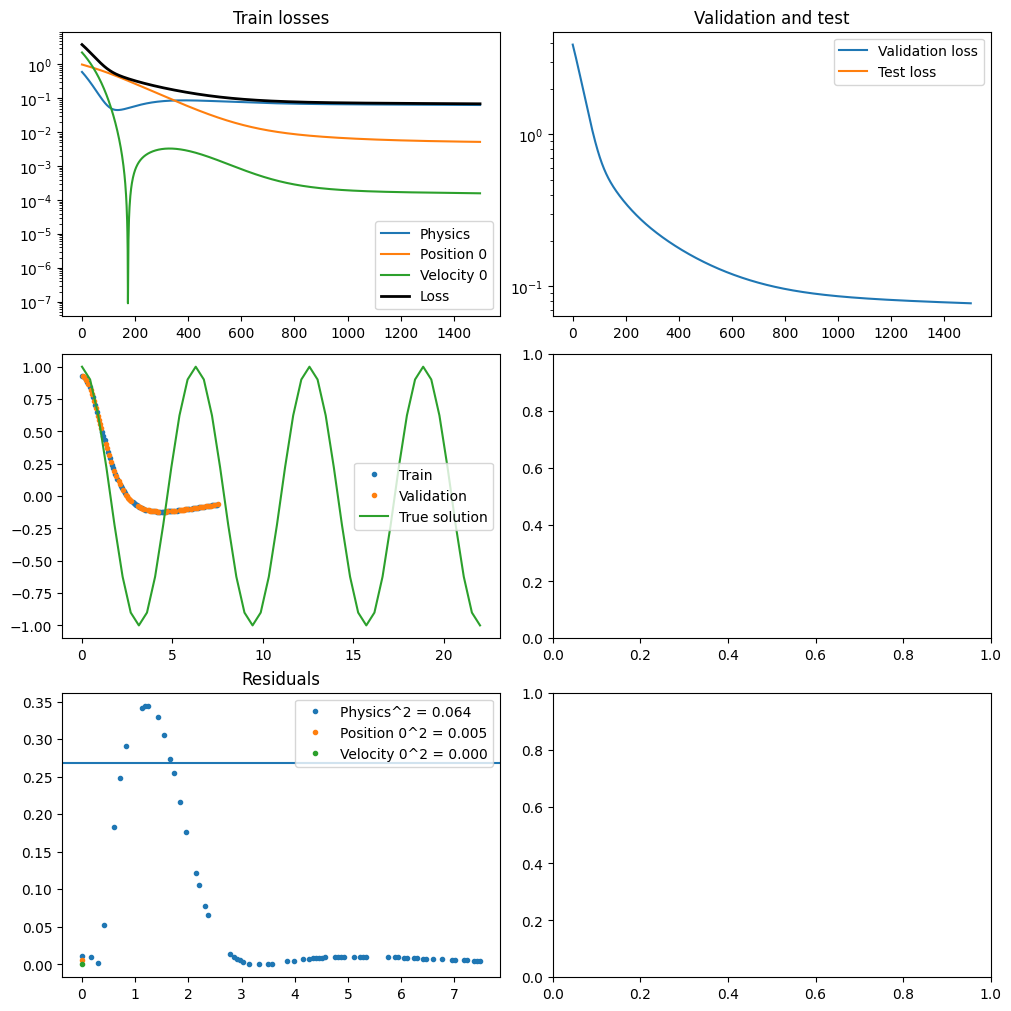

step 1600/8000:  Loss: 2.198E-06 ([6.31E-02,5.08E-03,1.54E-04]), val: 0.076 | ([1.00E+00,1.00E+00,1.00E+00])
step 1700/8000:  Loss: 2.198E-06 ([6.25E-02,4.99E-03,1.49E-04]), val: 0.075 | ([1.00E+00,1.00E+00,1.00E+00])
step 1800/8000:  Loss: 2.198E-06 ([6.20E-02,4.91E-03,1.45E-04]), val: 0.074 | ([1.00E+00,1.00E+00,1.00E+00])
step 1900/8000:  Loss: 2.198E-06 ([6.14E-02,4.84E-03,1.40E-04]), val: 0.073 | ([1.00E+00,1.00E+00,1.00E+00])
step 2000/8000:  Loss: 2.198E-06 ([6.08E-02,4.78E-03,1.35E-04]), val: 0.072 | ([1.00E+00,1.00E+00,1.00E+00])


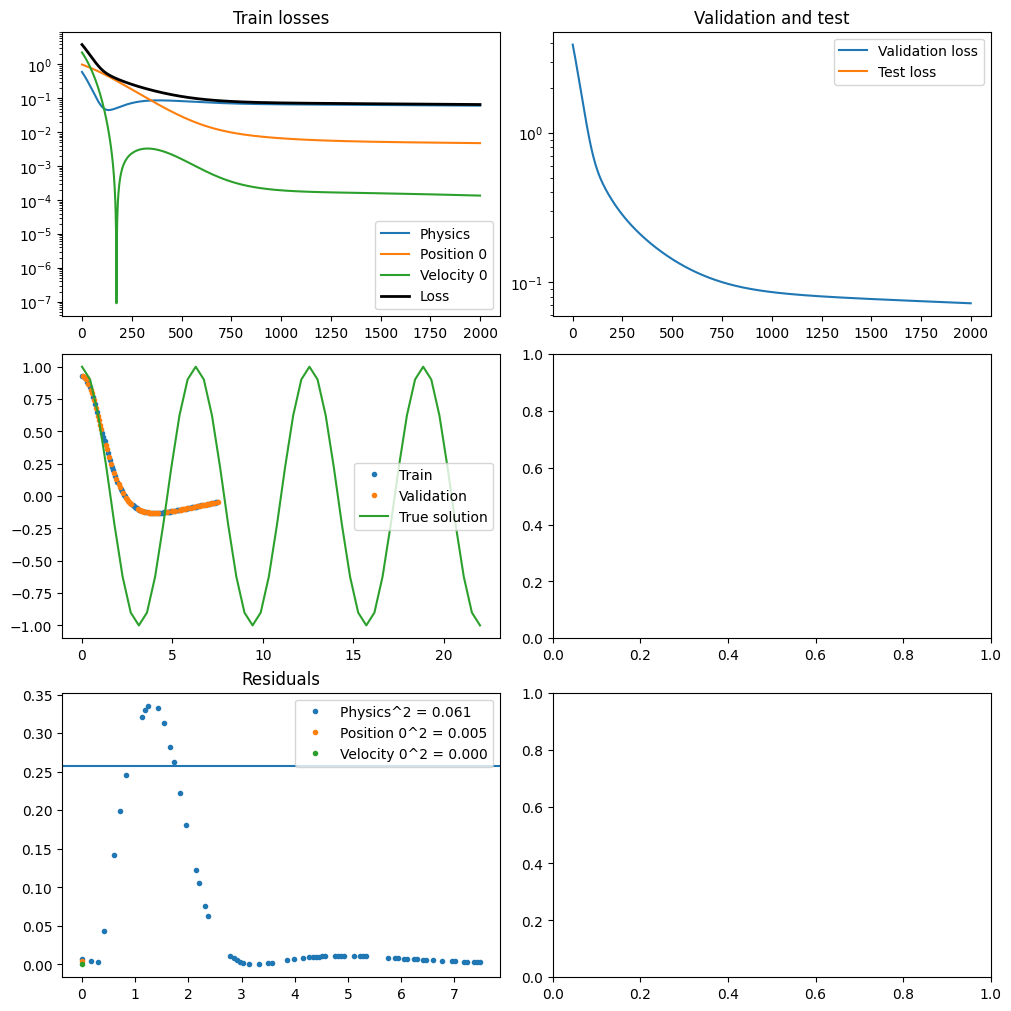

step 2100/8000:  Loss: 2.198E-06 ([6.03E-02,4.71E-03,1.31E-04]), val: 0.071 | ([1.00E+00,1.00E+00,1.00E+00])
step 2200/8000:  Loss: 2.198E-06 ([5.97E-02,4.65E-03,1.26E-04]), val: 0.070 | ([1.00E+00,1.00E+00,1.00E+00])
step 2300/8000:  Loss: 2.198E-06 ([5.91E-02,4.58E-03,1.22E-04]), val: 0.069 | ([1.00E+00,1.00E+00,1.00E+00])
step 2400/8000:  Loss: 2.198E-06 ([5.84E-02,4.52E-03,1.18E-04]), val: 0.068 | ([1.00E+00,1.00E+00,1.00E+00])
step 2500/8000:  Loss: 2.198E-06 ([5.78E-02,4.45E-03,1.13E-04]), val: 0.067 | ([1.00E+00,1.00E+00,1.00E+00])


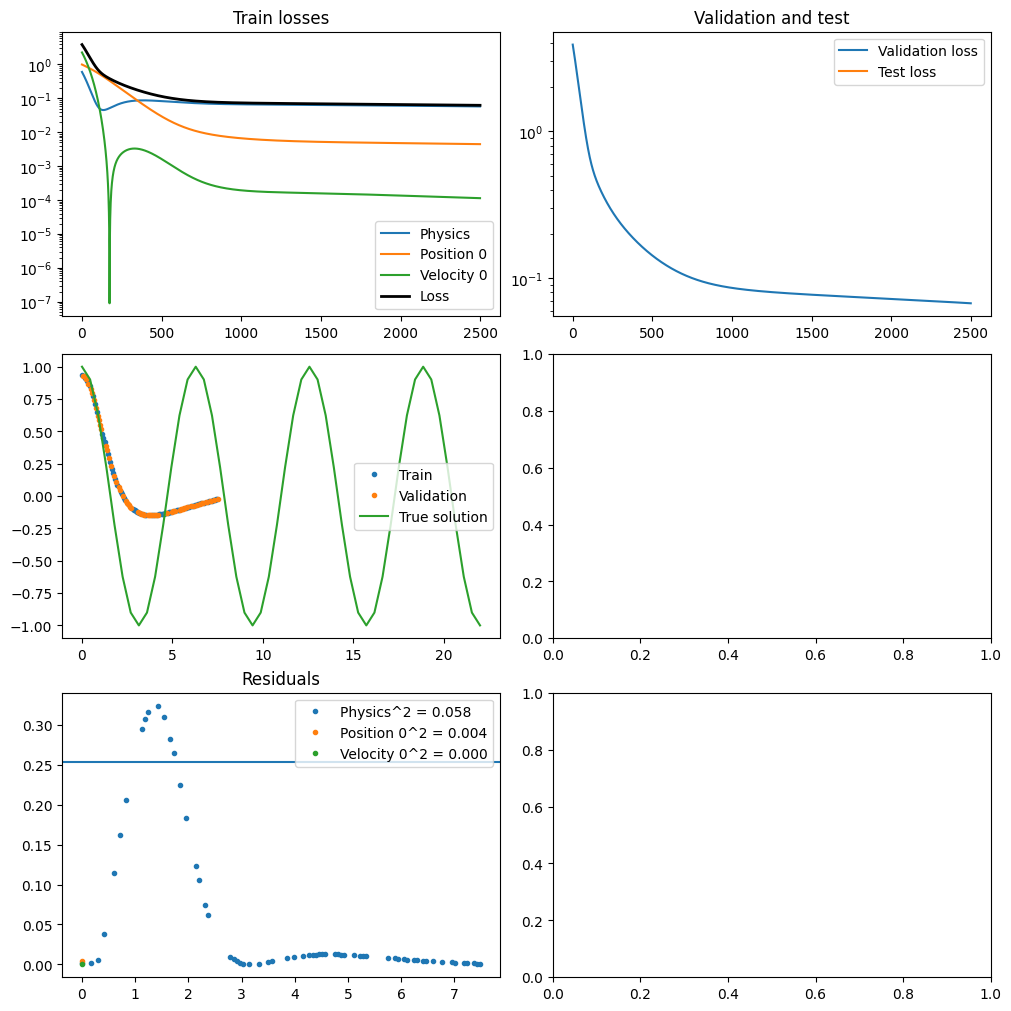

step 2600/8000:  Loss: 2.198E-06 ([5.71E-02,4.39E-03,1.09E-04]), val: 0.066 | ([1.00E+00,1.00E+00,1.00E+00])
step 2700/8000:  Loss: 2.198E-06 ([5.63E-02,4.32E-03,1.05E-04]), val: 0.065 | ([1.00E+00,1.00E+00,1.00E+00])
step 2800/8000:  Loss: 2.198E-06 ([5.56E-02,4.24E-03,1.01E-04]), val: 0.064 | ([1.00E+00,1.00E+00,1.00E+00])
step 2900/8000:  Loss: 2.198E-06 ([5.48E-02,4.17E-03,9.72E-05]), val: 0.063 | ([1.00E+00,1.00E+00,1.00E+00])
step 3000/8000:  Loss: 2.198E-06 ([5.39E-02,4.08E-03,9.28E-05]), val: 0.062 | ([1.00E+00,1.00E+00,1.00E+00])


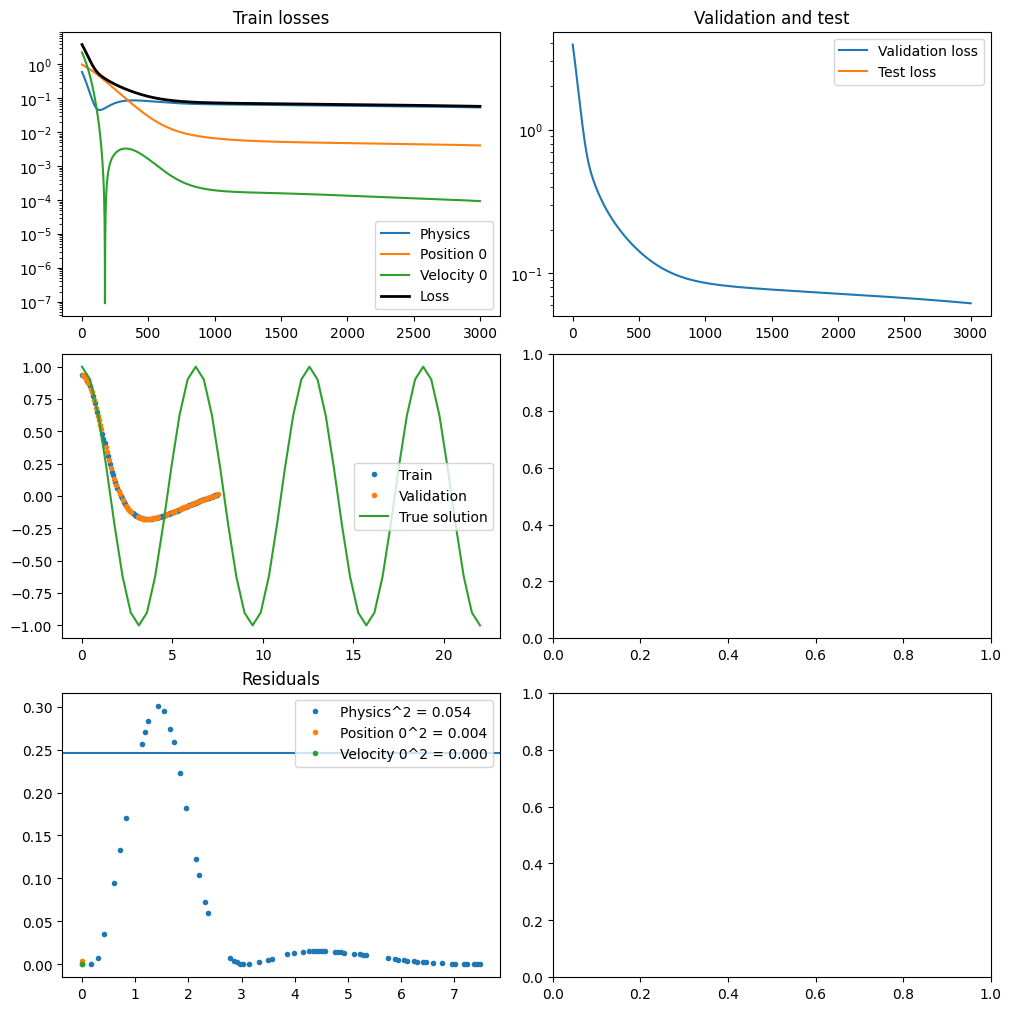

step 3100/8000:  Loss: 2.198E-06 ([5.31E-02,3.99E-03,8.80E-05]), val: 0.061 | ([1.00E+00,1.00E+00,1.00E+00])
step 3200/8000:  Loss: 2.198E-06 ([5.21E-02,3.90E-03,8.29E-05]), val: 0.060 | ([1.00E+00,1.00E+00,1.00E+00])
step 3300/8000:  Loss: 2.198E-06 ([5.12E-02,3.80E-03,7.74E-05]), val: 0.058 | ([1.00E+00,1.00E+00,1.00E+00])
step 3400/8000:  Loss: 2.198E-06 ([5.03E-02,3.69E-03,7.13E-05]), val: 0.057 | ([1.00E+00,1.00E+00,1.00E+00])
step 3500/8000:  Loss: 2.198E-06 ([4.93E-02,3.58E-03,6.49E-05]), val: 0.056 | ([1.00E+00,1.00E+00,1.00E+00])


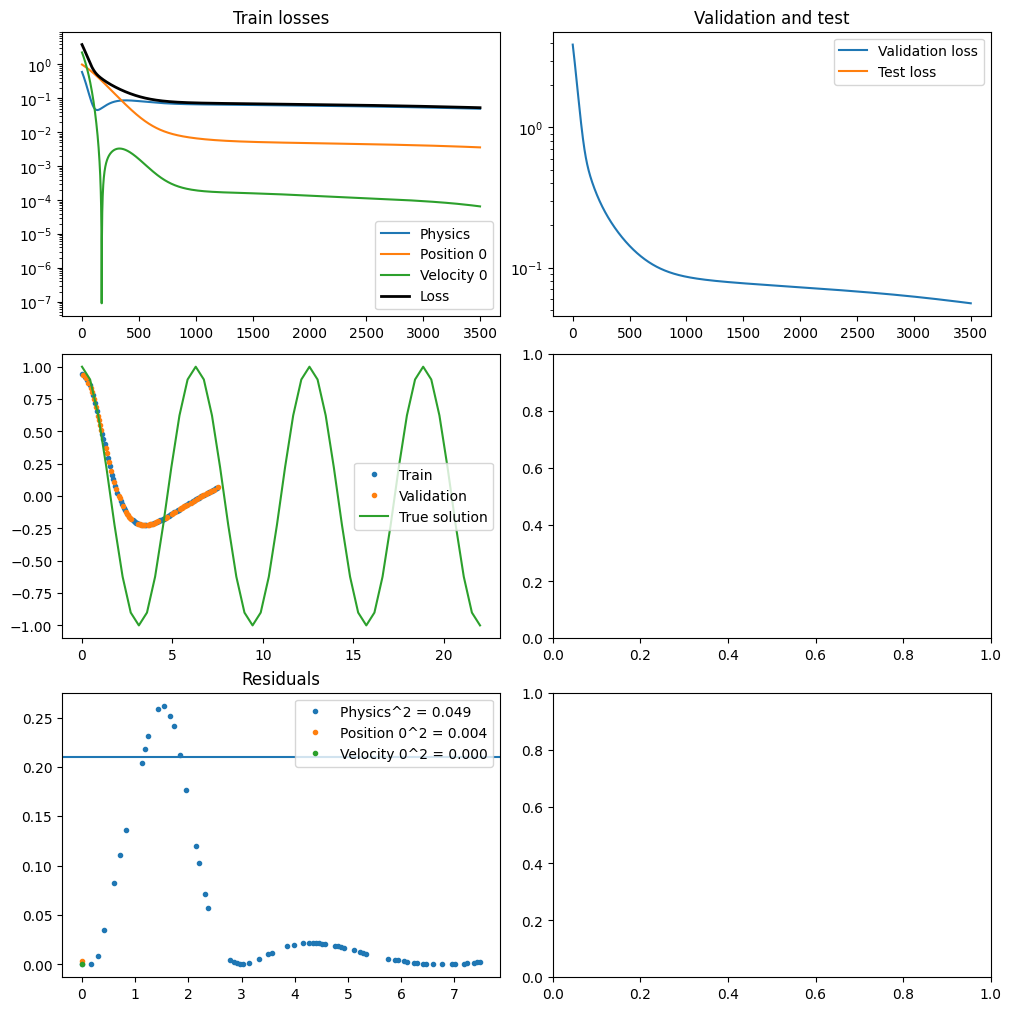

step 3600/8000:  Loss: 2.198E-06 ([4.84E-02,3.46E-03,5.81E-05]), val: 0.054 | ([1.00E+00,1.00E+00,1.00E+00])
step 3700/8000:  Loss: 2.198E-06 ([4.74E-02,3.33E-03,5.10E-05]), val: 0.053 | ([1.00E+00,1.00E+00,1.00E+00])
step 3800/8000:  Loss: 2.198E-06 ([4.65E-02,3.21E-03,4.40E-05]), val: 0.052 | ([1.00E+00,1.00E+00,1.00E+00])
step 3900/8000:  Loss: 2.198E-06 ([4.57E-02,3.08E-03,3.71E-05]), val: 0.051 | ([1.00E+00,1.00E+00,1.00E+00])
step 4000/8000:  Loss: 2.198E-06 ([4.49E-02,2.95E-03,3.06E-05]), val: 0.049 | ([1.00E+00,1.00E+00,1.00E+00])


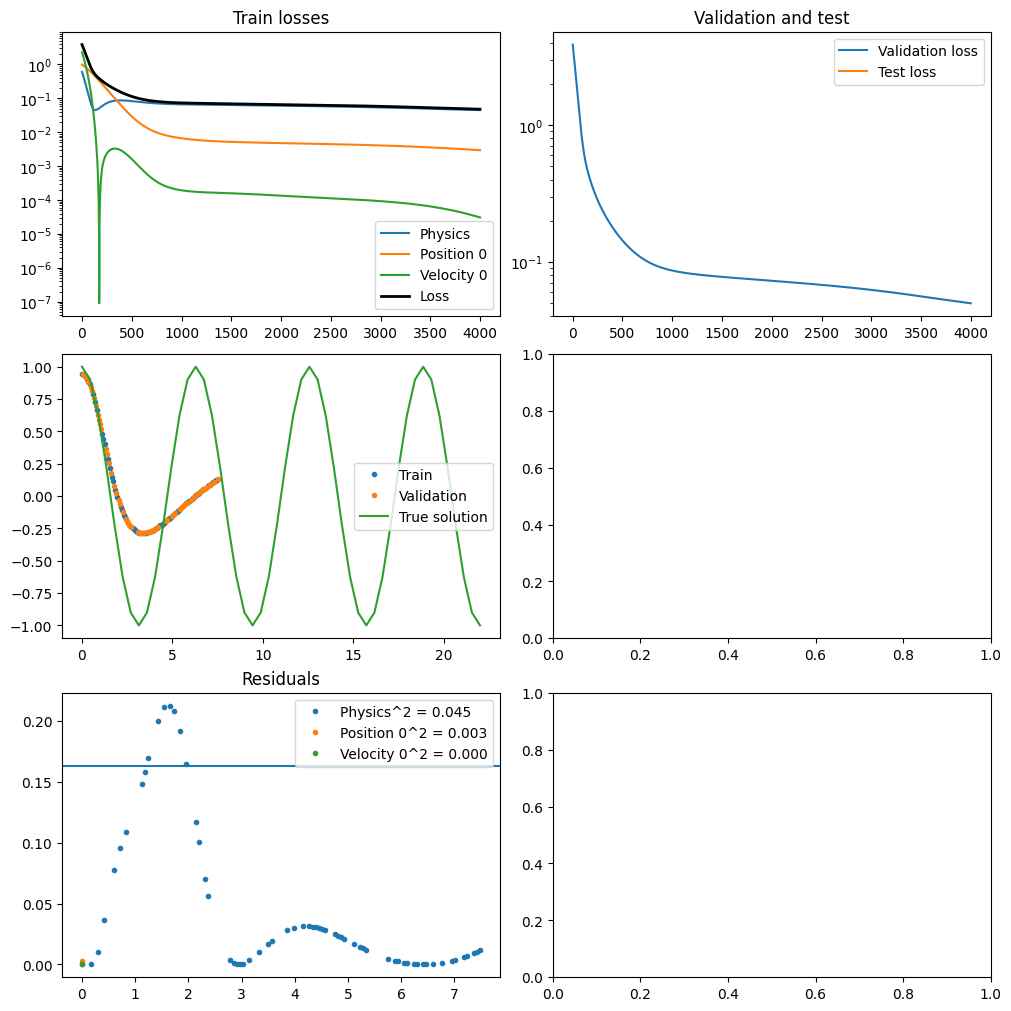

step 4100/8000:  Loss: 2.198E-06 ([4.42E-02,2.83E-03,2.47E-05]), val: 0.048 | ([1.00E+00,1.00E+00,1.00E+00])
step 4200/8000:  Loss: 2.198E-06 ([4.35E-02,2.71E-03,1.95E-05]), val: 0.047 | ([1.00E+00,1.00E+00,1.00E+00])
step 4300/8000:  Loss: 2.198E-06 ([4.29E-02,2.60E-03,1.52E-05]), val: 0.047 | ([1.00E+00,1.00E+00,1.00E+00])
step 4400/8000:  Loss: 2.198E-06 ([4.23E-02,2.50E-03,1.16E-05]), val: 0.046 | ([1.00E+00,1.00E+00,1.00E+00])
step 4500/8000:  Loss: 2.198E-06 ([4.18E-02,2.40E-03,8.86E-06]), val: 0.045 | ([1.00E+00,1.00E+00,1.00E+00])


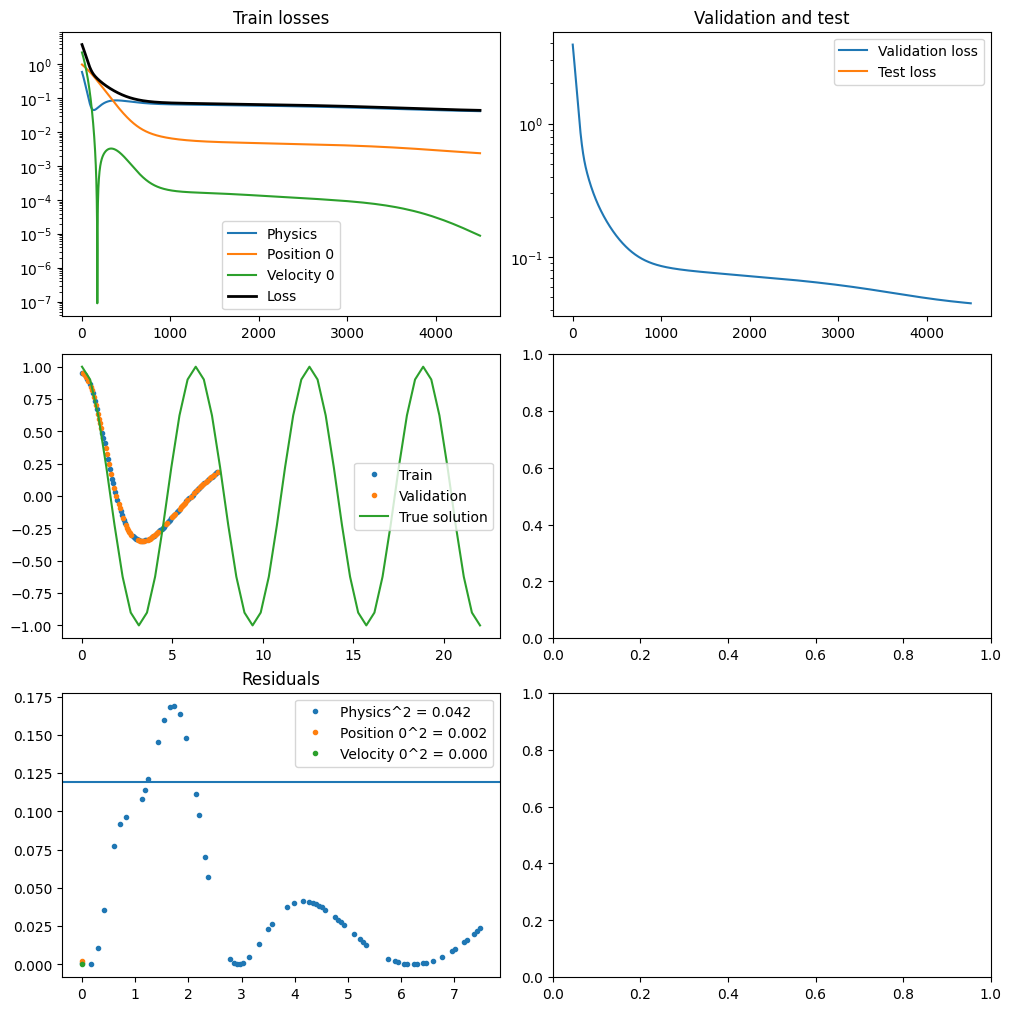

step 4600/8000:  Loss: 2.198E-06 ([4.14E-02,2.32E-03,6.72E-06]), val: 0.045 | ([1.00E+00,1.00E+00,1.00E+00])
step 4700/8000:  Loss: 2.198E-06 ([4.09E-02,2.24E-03,5.10E-06]), val: 0.044 | ([1.00E+00,1.00E+00,1.00E+00])
step 4800/8000:  Loss: 2.198E-06 ([4.05E-02,2.17E-03,3.90E-06]), val: 0.044 | ([1.00E+00,1.00E+00,1.00E+00])
step 4900/8000:  Loss: 2.198E-06 ([4.01E-02,2.11E-03,3.00E-06]), val: 0.043 | ([1.00E+00,1.00E+00,1.00E+00])
step 5000/8000:  Loss: 2.198E-06 ([3.98E-02,2.05E-03,2.32E-06]), val: 0.043 | ([1.00E+00,1.00E+00,1.00E+00])


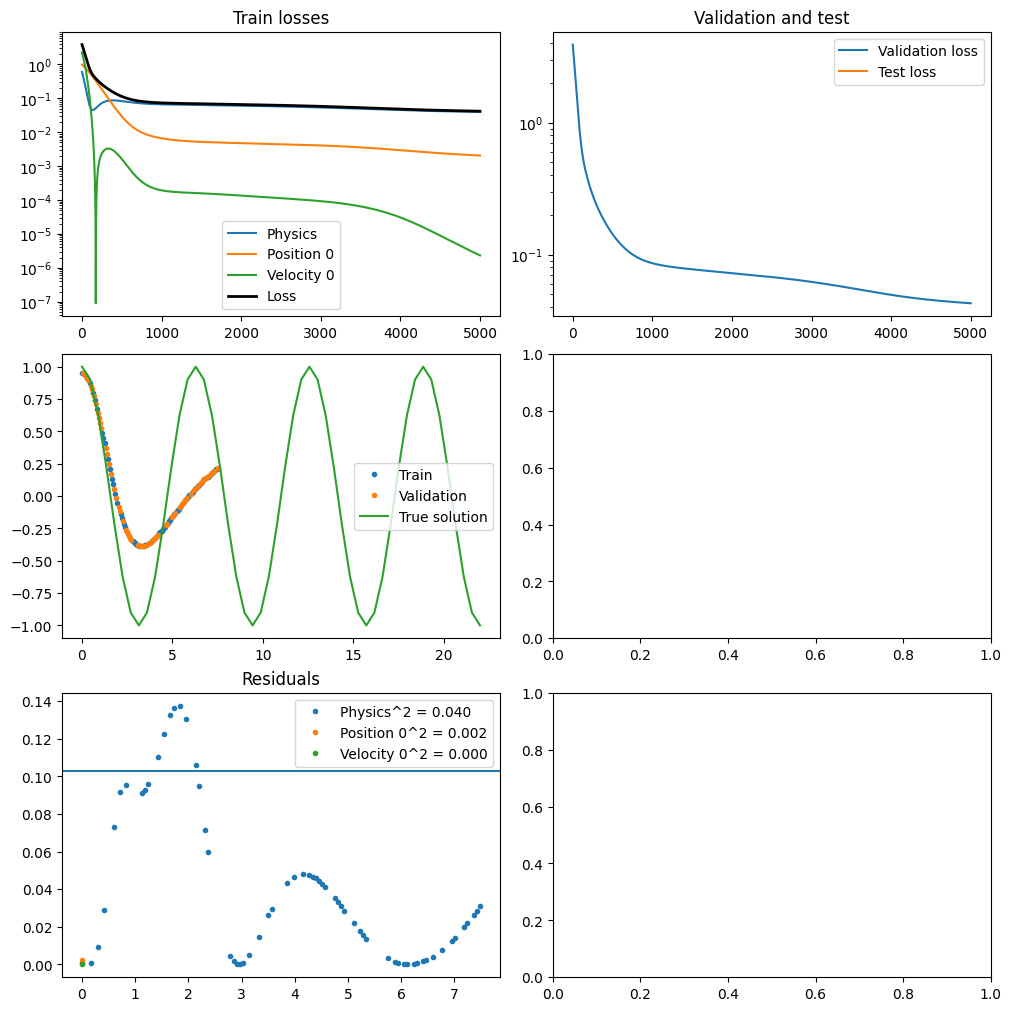

step 5100/8000:  Loss: 2.198E-06 ([3.94E-02,2.00E-03,1.80E-06]), val: 0.042 | ([1.00E+00,1.00E+00,1.00E+00])
step 5200/8000:  Loss: 2.198E-06 ([3.91E-02,1.95E-03,1.41E-06]), val: 0.042 | ([1.00E+00,1.00E+00,1.00E+00])
step 5300/8000:  Loss: 2.198E-06 ([3.88E-02,1.90E-03,1.09E-06]), val: 0.042 | ([1.00E+00,1.00E+00,1.00E+00])
step 5400/8000:  Loss: 2.198E-06 ([3.85E-02,1.86E-03,8.49E-07]), val: 0.041 | ([1.00E+00,1.00E+00,1.00E+00])
step 5500/8000:  Loss: 2.198E-06 ([3.82E-02,1.81E-03,6.56E-07]), val: 0.041 | ([1.00E+00,1.00E+00,1.00E+00])


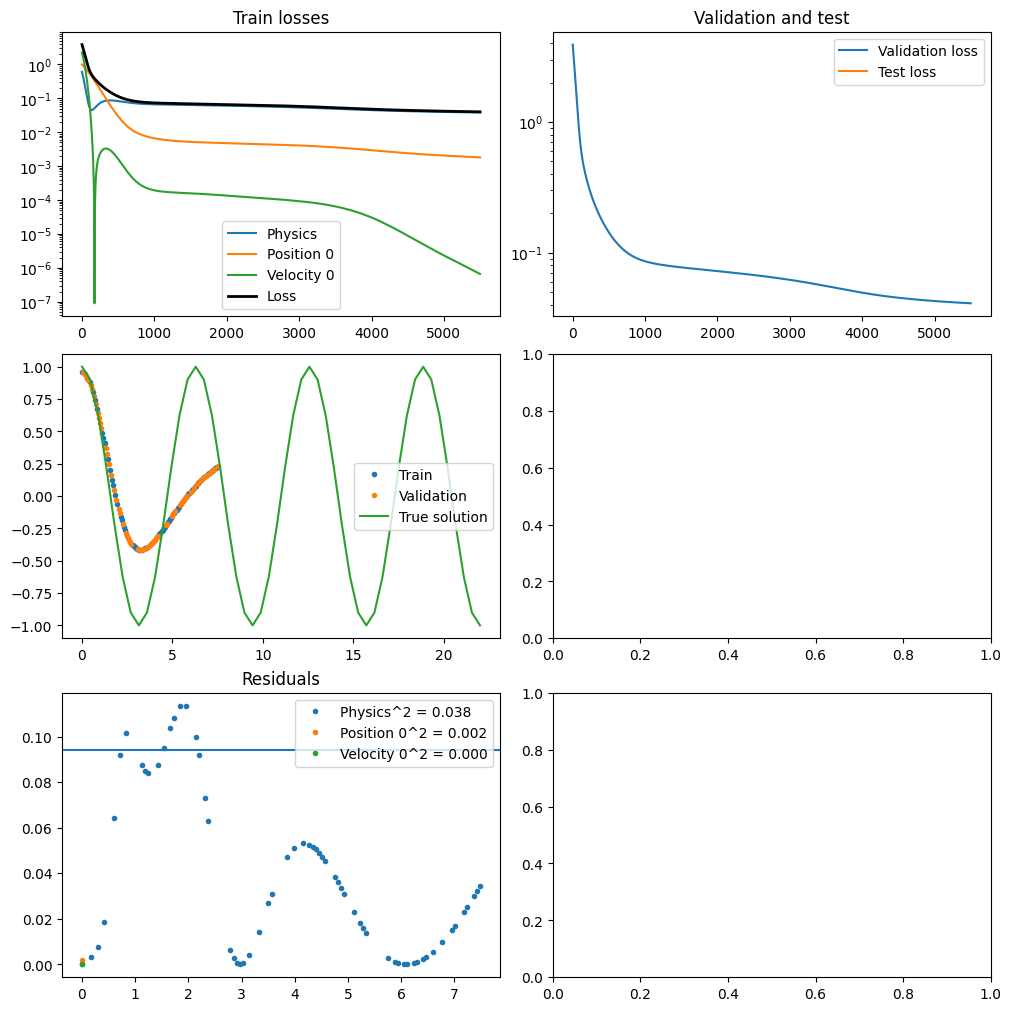

step 5600/8000:  Loss: 2.198E-06 ([3.79E-02,1.77E-03,5.03E-07]), val: 0.041 | ([1.00E+00,1.00E+00,1.00E+00])
step 5700/8000:  Loss: 2.198E-06 ([3.77E-02,1.74E-03,3.82E-07]), val: 0.041 | ([1.00E+00,1.00E+00,1.00E+00])
step 5800/8000:  Loss: 2.198E-06 ([3.74E-02,1.70E-03,2.87E-07]), val: 0.040 | ([1.00E+00,1.00E+00,1.00E+00])
step 5900/8000:  Loss: 2.198E-06 ([3.72E-02,1.67E-03,2.13E-07]), val: 0.040 | ([1.00E+00,1.00E+00,1.00E+00])
step 6000/8000:  Loss: 2.198E-06 ([3.70E-02,1.64E-03,1.58E-07]), val: 0.040 | ([1.00E+00,1.00E+00,1.00E+00])


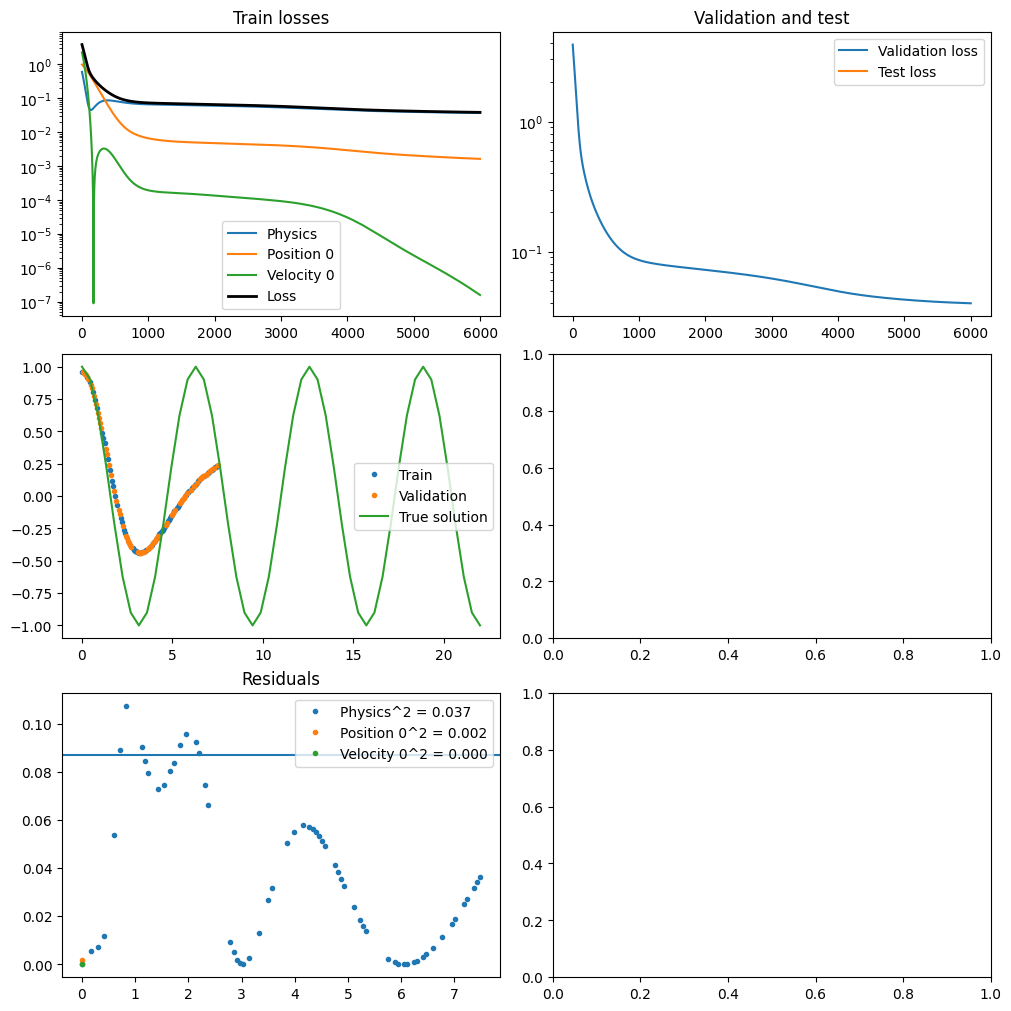

step 6100/8000:  Loss: 2.198E-06 ([3.68E-02,1.61E-03,1.16E-07]), val: 0.040 | ([1.00E+00,1.00E+00,1.00E+00])
step 6200/8000:  Loss: 2.198E-06 ([3.67E-02,1.59E-03,8.59E-08]), val: 0.040 | ([1.00E+00,1.00E+00,1.00E+00])
step 6300/8000:  Loss: 2.198E-06 ([3.65E-02,1.56E-03,6.45E-08]), val: 0.040 | ([1.00E+00,1.00E+00,1.00E+00])
step 6400/8000:  Loss: 2.198E-06 ([3.64E-02,1.54E-03,5.04E-08]), val: 0.039 | ([1.00E+00,1.00E+00,1.00E+00])
step 6500/8000:  Loss: 2.198E-06 ([3.62E-02,1.52E-03,4.10E-08]), val: 0.039 | ([1.00E+00,1.00E+00,1.00E+00])


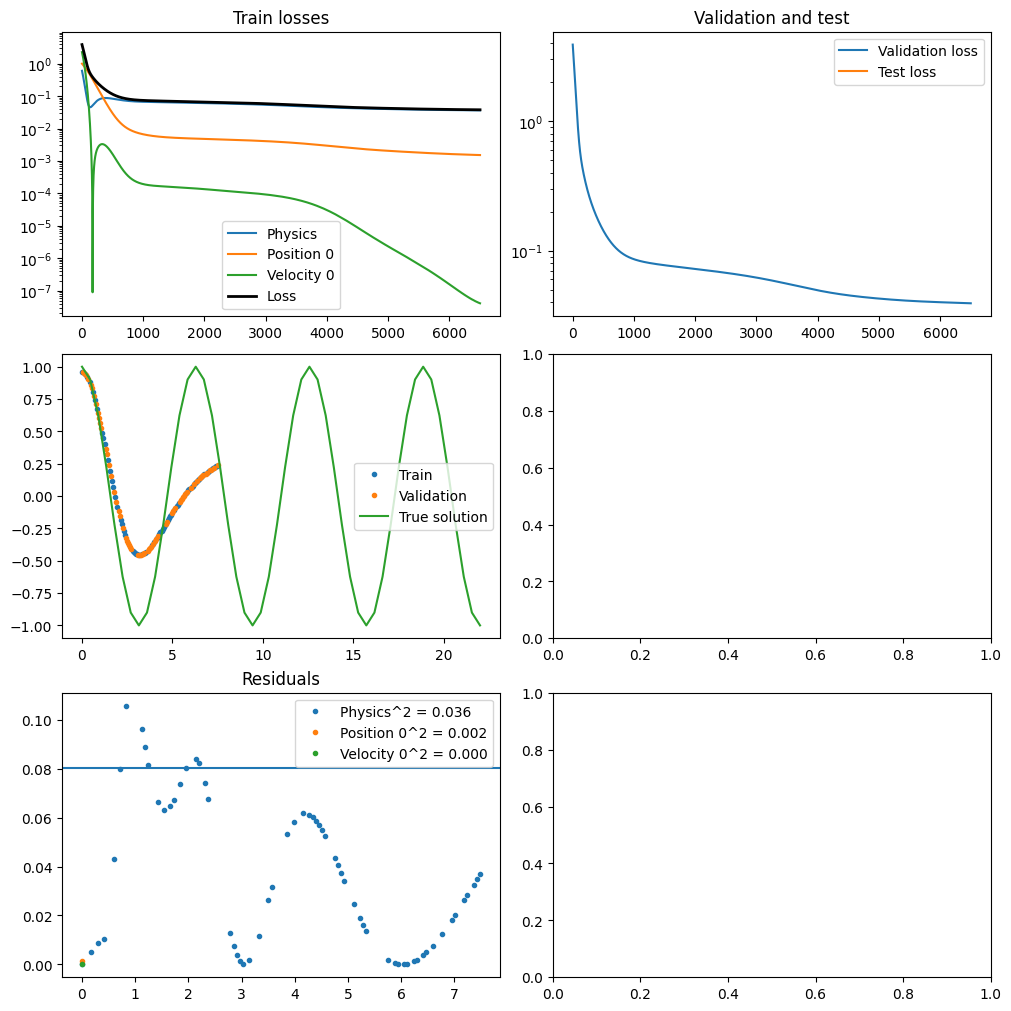

step 6600/8000:  Loss: 2.198E-06 ([3.61E-02,1.50E-03,3.58E-08]), val: 0.039 | ([1.00E+00,1.00E+00,1.00E+00])
step 6700/8000:  Loss: 2.198E-06 ([3.60E-02,1.49E-03,3.34E-08]), val: 0.039 | ([1.00E+00,1.00E+00,1.00E+00])
step 6800/8000:  Loss: 2.198E-06 ([3.59E-02,1.47E-03,3.35E-08]), val: 0.039 | ([1.00E+00,1.00E+00,1.00E+00])
step 6900/8000:  Loss: 2.198E-06 ([3.58E-02,1.46E-03,3.53E-08]), val: 0.039 | ([1.00E+00,1.00E+00,1.00E+00])
step 7000/8000:  Loss: 2.198E-06 ([3.58E-02,1.45E-03,3.83E-08]), val: 0.039 | ([1.00E+00,1.00E+00,1.00E+00])


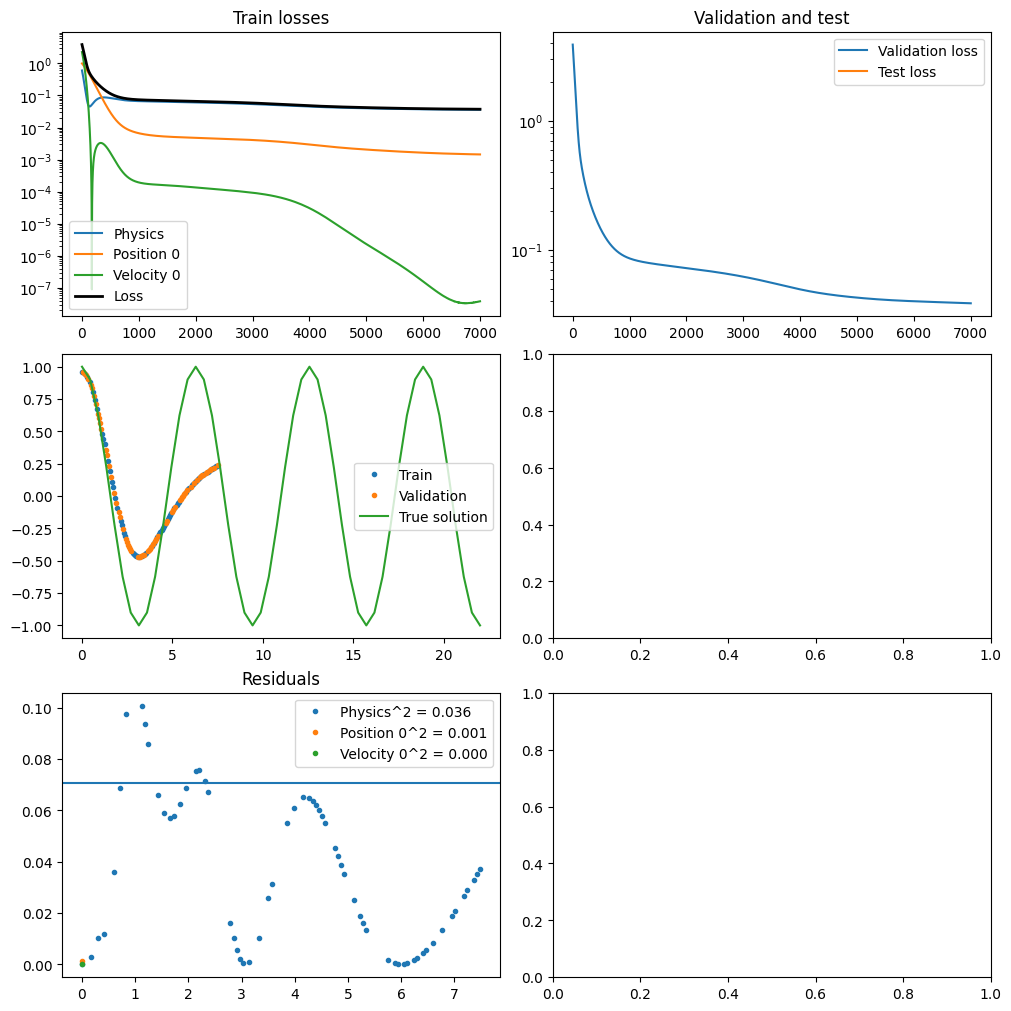

step 7100/8000:  Loss: 2.198E-06 ([3.57E-02,1.44E-03,4.23E-08]), val: 0.038 | ([1.00E+00,1.00E+00,1.00E+00])
step 7200/8000:  Loss: 2.198E-06 ([3.57E-02,1.43E-03,4.68E-08]), val: 0.038 | ([1.00E+00,1.00E+00,1.00E+00])
step 7300/8000:  Loss: 2.198E-06 ([3.56E-02,1.42E-03,5.14E-08]), val: 0.038 | ([1.00E+00,1.00E+00,1.00E+00])
step 7400/8000:  Loss: 2.198E-06 ([3.56E-02,1.41E-03,5.59E-08]), val: 0.038 | ([1.00E+00,1.00E+00,1.00E+00])
step 7500/8000:  Loss: 2.198E-06 ([3.55E-02,1.41E-03,5.95E-08]), val: 0.038 | ([1.00E+00,1.00E+00,1.00E+00])


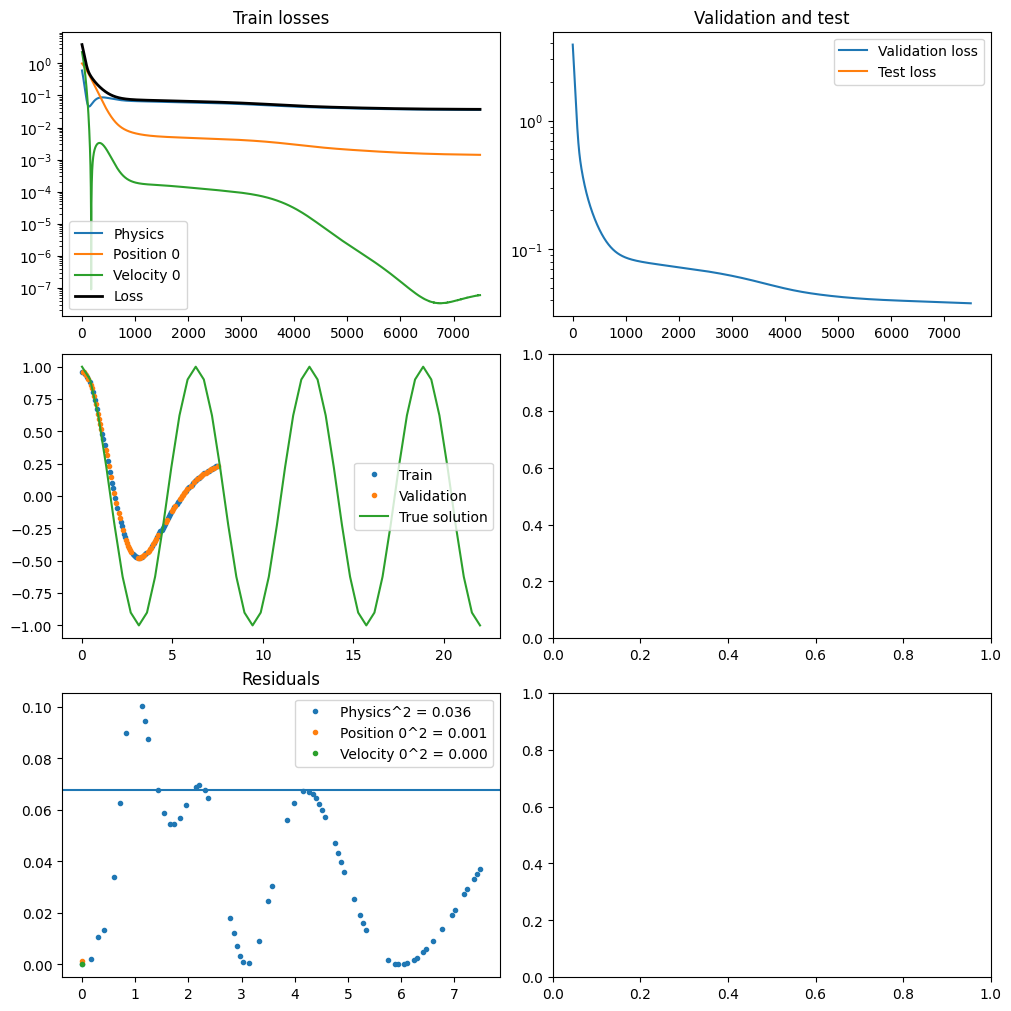

step 7600/8000:  Loss: 2.198E-06 ([3.55E-02,1.40E-03,6.27E-08]), val: 0.038 | ([1.00E+00,1.00E+00,1.00E+00])
step 7700/8000:  Loss: 2.198E-06 ([3.54E-02,1.40E-03,6.46E-08]), val: 0.038 | ([1.00E+00,1.00E+00,1.00E+00])
step 7800/8000:  Loss: 2.198E-06 ([3.54E-02,1.39E-03,6.54E-08]), val: 0.038 | ([1.00E+00,1.00E+00,1.00E+00])
step 7900/8000:  Loss: 2.198E-06 ([3.54E-02,1.38E-03,6.54E-08]), val: 0.037 | ([1.00E+00,1.00E+00,1.00E+00])


In [169]:
params_mlp,losses_train_mlp,losses_val_mlp,times_mlp=train_mlp(params_mlp,losses_mlp,W0,names,collocs,datas,sigmas,learning_rate=5e-4,steps = 8000,print_step =100,plot_step = 500)

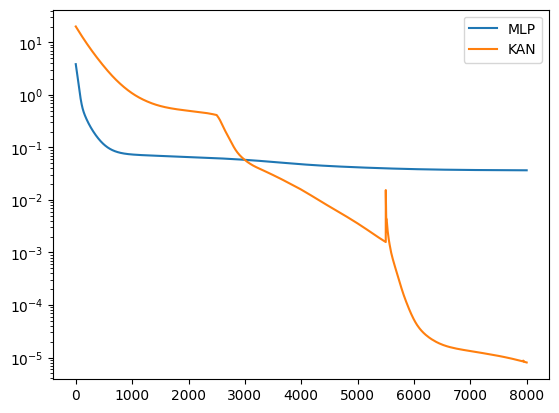

In [170]:
plt.semilogy(losses_train_mlp.sum(axis=1),label='MLP')#,losses_val_mlp
#plt.semilogy(losses_train_mlp.sum(axis=1),label='MLP')
plt.semilogy(losses_train_KAN.sum(axis=1),label='KAN')
plt.legend()

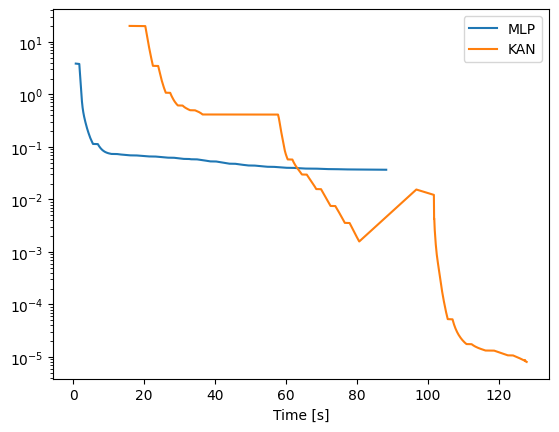

In [173]:
plt.semilogy(times_mlp ,losses_train_mlp.sum(axis=1),label='MLP')#,losses_val_mlp
#plt.semilogy(losses_train_mlp.sum(axis=1),label='MLP')
plt.semilogy(times_KAN,losses_train_KAN.sum(axis=1),label='KAN')
plt.xlabel('Time [s]')
plt.legend()